In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import glob
plt.rcParams.update({'mathtext.default':'regular'})

### Read in csv files and clean data

In [2]:
logit_responsive_df = pd.read_csv('Logit Parameters, Random, Responsive.csv',skiprows=6)
logit_responsive_df.drop(['%-Random-Inspections', 'Inspection-Strategy', 'Enforcement-Strategy',
                                  '#-Inspectors','%-Escalate','avg-violations-conscious', '%-Criminal-Offenders',
                                  '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
                                  '%-Conscious-Offenders', 'avg-violations-unintentional',
                                  'radius-of-peers', 'length-of-run',
                                  '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
                                  'React-to-Peer-Pressure', 'React-to-Enforcement',
                                  'avg-violations-criminal', '%-Compliant-Inspectees'], inplace=True, axis=1)
logit_responsive_df = logit_responsive_df.rename(columns={'[step]': 'step', '[run number]':'run','logit-normal-mu':'mu', 'logit-normal-sigma':'sigma'})
logit_responsive_df['total-inspectees'] = logit_responsive_df['#-compliant-inspectees'] + logit_responsive_df['#-unintentional-violators'] + logit_responsive_df['#-conscious-violators'] + logit_responsive_df['#-criminal-violators'] 
logit_responsive_df['perc-compliant'] = logit_responsive_df['#-compliant-inspectees'] / logit_responsive_df['total-inspectees'] * 100
logit_responsive_df['perc-compliant'] = logit_responsive_df['perc-compliant'].fillna(0)
logit_responsive_df['perc-unintentional'] = logit_responsive_df['#-unintentional-violators'] / logit_responsive_df['total-inspectees'] * 100
logit_responsive_df['perc-unintentional'] = logit_responsive_df['perc-unintentional'].fillna(0)
logit_responsive_df['perc-conscious'] = logit_responsive_df['#-conscious-violators'] / logit_responsive_df['total-inspectees'] * 100
logit_responsive_df['perc-conscious'] = logit_responsive_df['perc-conscious'].fillna(0)
logit_responsive_df['perc-criminal'] = logit_responsive_df['#-criminal-violators'] / logit_responsive_df['total-inspectees'] * 100
logit_responsive_df['perc-criminal'] = logit_responsive_df['perc-criminal'].fillna(0)
logit_responsive_df['perc-noncompliant'] = (logit_responsive_df['perc-unintentional'] + logit_responsive_df['perc-conscious'] + logit_responsive_df['perc-criminal']) 

In [3]:
logit_responsive_df.columns

Index(['run', 'mu', 'sigma', 'step', 'avg-compliance-rate',
       '#-compliant-inspectees', '#-unintentional-violators',
       '#-conscious-violators', '#-criminal-violators',
       'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity 

In [4]:
logit_responsive_df['sum-absorb-inspectees'] = (logit_responsive_df['count inspectees with [absorbance-capacity < .1]'] + 
logit_responsive_df['count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]'] + 
logit_responsive_df['count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]'] +
logit_responsive_df['count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]'] + 
logit_responsive_df['count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]'] +
logit_responsive_df['count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]'] + 
logit_responsive_df['count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]'] +
logit_responsive_df['count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]'] + 
logit_responsive_df['count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]'] +
logit_responsive_df['count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'] )
logit_responsive_df['perc-1'] = logit_responsive_df['count inspectees with [absorbance-capacity < .1]'] / logit_responsive_df['sum-absorb-inspectees'] * 100
logit_responsive_df['perc-12'] = logit_responsive_df['count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]'] / logit_responsive_df['sum-absorb-inspectees'] * 100 
logit_responsive_df['perc-23'] = logit_responsive_df['count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]'] / logit_responsive_df['sum-absorb-inspectees'] * 100
logit_responsive_df['perc-34'] = logit_responsive_df['count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]'] / logit_responsive_df['sum-absorb-inspectees'] * 100
logit_responsive_df['perc-45'] = logit_responsive_df['count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]'] / logit_responsive_df['sum-absorb-inspectees'] * 100
logit_responsive_df['perc-56'] = logit_responsive_df['count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]'] / logit_responsive_df['sum-absorb-inspectees'] * 100
logit_responsive_df['perc-67'] = logit_responsive_df['count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]'] / logit_responsive_df['sum-absorb-inspectees'] * 100
logit_responsive_df['perc-78'] = logit_responsive_df['count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]'] / logit_responsive_df['sum-absorb-inspectees'] * 100
logit_responsive_df['perc-89'] = logit_responsive_df['count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]'] / logit_responsive_df['sum-absorb-inspectees'] * 100
logit_responsive_df['perc-91'] = logit_responsive_df['count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'] / logit_responsive_df['sum-absorb-inspectees'] * 100
logit_responsive_df.drop(['count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]',
                       'total-inspectees','sum-absorb-inspectees'], inplace=True, axis=1)

In [ ]:
logit_responsive_df

In [42]:
agg_summary_logit_responsive_avg = logit_responsive_df.groupby(['mu', 'sigma'], as_index=False).mean()
agg_summary_logit_responsive_avg.drop(['run','step'], inplace=True, axis=1)
agg_summary_logit_responsive_avg = agg_summary_logit_responsive_avg.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                                                'perc-compliant':'perc-compliant-mean', 
                                                                                'perc-unintentional':'perc-unintentional-mean',
                                                                               'perc-conscious': 'perc-conscious-mean',
                                                                               'perc-criminal': 'perc-criminal-mean',
                                                                               'perc-noncompliant': 'perc-noncompliant-mean',
                                                                               'perc-1':'perc-1-mean', 
                                                                                'perc-12':'perc-12-mean', 
                                                                                'perc-23':'perc-23-mean', 
                                                                                'perc-34':'perc-34-mean',
                                                                                'perc-45':'perc-45-mean', 
                                                                                'perc-56':'perc-56-mean', 
                                                                                'perc-67':'perc-67-mean', 
                                                                                'perc-78':'perc-78-mean', 
                                                                                'perc-89':'perc-89-mean', 
                                                                                'perc-91':'perc-91-mean'})
agg_summary_logit_responsive_avg['index'] = ((agg_summary_logit_responsive_avg['mu'] * 10).astype('int')).astype('str') + "-" + ((agg_summary_logit_responsive_avg['sigma'] * 10).astype('int')).astype('str')                                                                                  
agg_summary_logit_responsive_avg = agg_summary_logit_responsive_avg.set_index('index')
agg_summary_logit_responsive_avg

,mu,sigma,avg-compliance-rate-mean,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant-mean,perc-unintentional-mean,perc-conscious-mean,...,perc-1-mean,perc-12-mean,perc-23-mean,perc-34-mean,perc-45-mean,perc-56-mean,perc-67-mean,perc-78-mean,perc-89-mean,perc-91-mean
index,,,,,,,,,,,,,,,,,,,,,
0-0,0.0,0.0,98.979938,7864.358042,1.271229,4.365135,0.132867,99.826852,0.016140,0.055421,...,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
0-1,0.0,0.1,98.988265,7864.342857,1.260639,4.391209,0.132867,99.826655,0.016005,0.055752,...,0.000000,0.000000,0.000000,0.005077,50.101549,49.888297,0.005077,0.000000,0.000000,0.000000
0-2,0.0,0.2,98.991484,7864.418482,1.267932,4.308392,0.132967,99.827613,0.016098,0.054701,...,0.000000,0.000000,0.000000,2.159177,47.724042,47.920792,2.194719,0.001269,0.000000,0.000000
0-3,0.0,0.3,98.978587,7864.282018,1.279520,4.433167,0.132967,99.825882,0.016245,0.056285,...,0.000000,0.002539,0.237370,8.486926,41.312516,41.058644,8.644326,0.257680,0.000000,0.000000
0-4,0.0,0.4,98.970991,7864.202198,1.262438,4.529371,0.133067,99.824876,0.016028,0.057506,...,0.000000,0.015232,1.656512,13.811881,34.496065,34.438944,13.865194,1.693323,0.022848,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-6,1.0,0.6,90.323610,7664.754446,3.767932,201.249550,0.355544,97.293163,0.047832,2.554591,...,0.000000,0.003808,0.104087,0.837776,3.735720,11.345519,23.936278,34.055598,23.738258,2.242955
10-7,1.0,0.7,93.955204,7758.657043,2.735564,108.505495,0.229471,98.485123,0.034727,1.377336,...,0.000000,0.036811,0.396040,1.765677,5.290683,11.966235,21.798680,29.598883,24.798172,4.348819
10-8,1.0,0.8,94.997321,7788.299401,2.386114,79.233367,0.208891,98.861389,0.030292,1.005767,...,0.006347,0.149784,0.945671,2.942371,6.491495,12.292460,19.612846,25.945671,24.953034,6.660320


In [43]:
agg_summary_logit_responsive_std = logit_responsive_df.groupby(['mu', 'sigma'], as_index=False).std()
agg_summary_logit_responsive_std.drop(['run','step'], inplace=True, axis=1)
agg_summary_logit_responsive_std = agg_summary_logit_responsive_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                                                'perc-compliant':'perc-compliant-std', 
                                                                                'perc-unintentional':'perc-unintentional-std',
                                                                               'perc-conscious': 'perc-conscious-std',
                                                                               'perc-criminal': 'perc-criminal-std',
                                                                               'perc-noncompliant': 'perc-noncompliant-std',
                                                                               'perc-1':'perc-1-std', 
                                                                                'perc-12':'perc-12-std', 
                                                                                'perc-23':'perc-23-std', 
                                                                                'perc-34':'perc-34-std',
                                                                                'perc-45':'perc-45-std', 
                                                                                'perc-56':'perc-56-std', 
                                                                                'perc-67':'perc-67-std', 
                                                                                'perc-78':'perc-78-std', 
                                                                                'perc-89':'perc-89-std', 
                                                                                'perc-91':'perc-91-std'})
agg_summary_logit_responsive_std['index'] = ((agg_summary_logit_responsive_std['mu'] * 10).astype('int')).astype('str') + "-" + ((agg_summary_logit_responsive_std['sigma'] * 10).astype('int')).astype('str')                                                                                  
agg_summary_logit_responsive_std = agg_summary_logit_responsive_std.set_index('index')
agg_summary_logit_responsive_std

,mu,sigma,avg-compliance-rate-std,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant-std,perc-unintentional-std,perc-conscious-std,...,perc-1-std,perc-12-std,perc-23-std,perc-34-std,perc-45-std,perc-56-std,perc-67-std,perc-78-std,perc-89-std,perc-91-std
index,,,,,,,,,,,,,,,,,,,,,
0-0,0.0,0.0,6.442828,291.901983,32.071606,116.603584,4.201838,3.705104,0.407203,1.480483,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0-1,0.0,0.1,6.423241,291.940085,32.033067,116.706542,4.201838,3.705591,0.406713,1.481789,...,0.000000,0.000000,0.000000,0.008420,0.441788,0.438963,0.006219,0.000000,0.000000,0.000000
0-2,0.0,0.2,6.416315,291.707647,32.049289,116.260350,4.201846,3.702647,0.406918,1.476126,...,0.000000,0.000000,0.000000,0.106427,0.450923,0.455430,0.123526,0.003808,0.000000,0.000000
0-3,0.0,0.3,6.441271,292.079832,32.112498,116.909811,4.201846,3.707367,0.407721,1.484369,...,0.000000,0.005078,0.057068,0.209681,0.545650,0.752312,0.336193,0.052967,0.000000,0.000000
0-4,0.0,0.4,6.455399,292.142678,32.023164,117.125788,4.201855,3.708151,0.406588,1.487112,...,0.000000,0.009499,0.169291,0.494535,0.507108,0.527946,0.272914,0.163179,0.025261,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-6,1.0,0.6,12.022016,703.588915,33.599502,643.128858,4.315391,8.930982,0.426593,8.163685,...,0.000000,0.005817,0.018657,0.115371,0.156921,0.313462,0.459560,0.640811,0.435485,0.151381
10-7,1.0,0.7,10.083254,522.549876,33.169792,442.591071,4.243558,6.632924,0.421139,5.618170,...,0.000000,0.019210,0.061877,0.148739,0.296773,0.364969,0.353349,0.529633,0.327757,0.249931
10-8,1.0,0.8,9.559745,480.343543,33.084080,392.617883,4.235667,6.097175,0.420051,4.983836,...,0.008516,0.032513,0.082317,0.126663,0.303293,0.442196,0.539062,0.444116,0.579663,0.326518


In [44]:
agg_summary_logit_responsive_std.drop(['mu','sigma'], inplace=True, axis=1)
agg_summary_logit_responsive = pd.concat([agg_summary_logit_responsive_avg, agg_summary_logit_responsive_std], axis=1)
#agg_summary_logit_responsive.to_csv('agg_summary_logit_responsive.csv')
agg_summary_logit_responsive

,mu,sigma,avg-compliance-rate-mean,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant-mean,perc-unintentional-mean,perc-conscious-mean,...,perc-1-std,perc-12-std,perc-23-std,perc-34-std,perc-45-std,perc-56-std,perc-67-std,perc-78-std,perc-89-std,perc-91-std
index,,,,,,,,,,,,,,,,,,,,,
0-0,0.0,0.0,98.979938,7864.358042,1.271229,4.365135,0.132867,99.826852,0.016140,0.055421,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0-1,0.0,0.1,98.988265,7864.342857,1.260639,4.391209,0.132867,99.826655,0.016005,0.055752,...,0.000000,0.000000,0.000000,0.008420,0.441788,0.438963,0.006219,0.000000,0.000000,0.000000
0-2,0.0,0.2,98.991484,7864.418482,1.267932,4.308392,0.132967,99.827613,0.016098,0.054701,...,0.000000,0.000000,0.000000,0.106427,0.450923,0.455430,0.123526,0.003808,0.000000,0.000000
0-3,0.0,0.3,98.978587,7864.282018,1.279520,4.433167,0.132967,99.825882,0.016245,0.056285,...,0.000000,0.005078,0.057068,0.209681,0.545650,0.752312,0.336193,0.052967,0.000000,0.000000
0-4,0.0,0.4,98.970991,7864.202198,1.262438,4.529371,0.133067,99.824876,0.016028,0.057506,...,0.000000,0.009499,0.169291,0.494535,0.507108,0.527946,0.272914,0.163179,0.025261,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-6,1.0,0.6,90.323610,7664.754446,3.767932,201.249550,0.355544,97.293163,0.047832,2.554591,...,0.000000,0.005817,0.018657,0.115371,0.156921,0.313462,0.459560,0.640811,0.435485,0.151381
10-7,1.0,0.7,93.955204,7758.657043,2.735564,108.505495,0.229471,98.485123,0.034727,1.377336,...,0.000000,0.019210,0.061877,0.148739,0.296773,0.364969,0.353349,0.529633,0.327757,0.249931
10-8,1.0,0.8,94.997321,7788.299401,2.386114,79.233367,0.208891,98.861389,0.030292,1.005767,...,0.008516,0.032513,0.082317,0.126663,0.303293,0.442196,0.539062,0.444116,0.579663,0.326518


In [45]:
summary_responsive = pd.concat([agg_summary_logit_responsive_avg['mu'],
                                     agg_summary_logit_responsive_avg['sigma'],
                                     agg_summary_logit_responsive_avg['avg-compliance-rate-mean'], 
                                     agg_summary_logit_responsive_std['avg-compliance-rate-std'],
                                     agg_summary_logit_responsive_avg['perc-compliant-mean'], 
                                     agg_summary_logit_responsive_std['perc-compliant-std']], axis=1)
summary_responsive.round(decimals=3)

,mu,sigma,avg-compliance-rate-mean,avg-compliance-rate-std,perc-compliant-mean,perc-compliant-std
index,,,,,,
0-0,0.0,0.0,98.980,6.443,99.827,3.705
0-1,0.0,0.1,98.988,6.423,99.827,3.706
0-2,0.0,0.2,98.991,6.416,99.828,3.703
0-3,0.0,0.3,98.979,6.441,99.826,3.707
0-4,0.0,0.4,98.971,6.455,99.825,3.708
...,...,...,...,...,...,...
10-6,1.0,0.6,90.324,12.022,97.293,8.931
10-7,1.0,0.7,93.955,10.083,98.485,6.633
10-8,1.0,0.8,94.997,9.560,98.861,6.097


In [47]:
responsive_logit_mu_0 = summary_responsive.query('mu==0')
responsive_logit_mu_1 = summary_responsive.query('mu==.1')
responsive_logit_mu_2 = summary_responsive.query('mu==.2')
responsive_logit_mu_3 = summary_responsive.query('mu==.3')
responsive_logit_mu_4 = summary_responsive.query('mu==.4')
responsive_logit_mu_5 = summary_responsive.query('mu==.5')
responsive_logit_mu_6 = summary_responsive.query('mu==.6')
responsive_logit_mu_7 = summary_responsive.query('mu==.7')
responsive_logit_mu_8 = summary_responsive.query('mu==.8')
responsive_logit_mu_9 = summary_responsive.query('mu==.9')
responsive_logit_mu_10 = summary_responsive.query('mu==1')
responsive_logit_mu_7

,mu,sigma,avg-compliance-rate-mean,avg-compliance-rate-std,perc-compliant-mean,perc-compliant-std
index,,,,,,
7-0,0.7,0.0,7.324508,4.608391,6.493062,4.962316
7-1,0.7,0.1,95.634058,9.347738,99.058065,5.858678
7-2,0.7,0.2,97.322526,8.022718,99.479933,4.652575
7-3,0.7,0.3,97.524290,7.867363,99.521290,4.543621
7-4,0.7,0.4,97.641043,7.816333,99.551853,4.500238
7-5,0.7,0.5,97.691169,7.804611,99.564364,4.508816
7-6,0.7,0.6,97.970607,7.539790,99.626167,4.287914
7-7,0.7,0.7,98.033411,7.460028,99.638610,4.242286
7-8,0.7,0.8,98.079341,7.433813,99.647912,4.217424


In [48]:
agg_summary_logit_responsive_1 = agg_summary_logit_responsive.query('mu==.1').reset_index()
agg_summary_logit_responsive_2 = agg_summary_logit_responsive.query('mu==.2').reset_index()
agg_summary_logit_responsive_3 = agg_summary_logit_responsive.query('mu==.3').reset_index()
agg_summary_logit_responsive_4 = agg_summary_logit_responsive.query('mu==.4').reset_index()
agg_summary_logit_responsive_5 = agg_summary_logit_responsive.query('mu==.5').reset_index()
agg_summary_logit_responsive_6 = agg_summary_logit_responsive.query('mu==.6').reset_index()
agg_summary_logit_responsive_7 = agg_summary_logit_responsive.query('mu==.7').reset_index()
agg_summary_logit_responsive_8 = agg_summary_logit_responsive.query('mu==.8').reset_index()
agg_summary_logit_responsive_9 = agg_summary_logit_responsive.query('mu==.9').reset_index()
agg_summary_logit_responsive_10 = agg_summary_logit_responsive.query('mu==1').reset_index()
agg_summary_logit_responsive_2

,index,mu,sigma,avg-compliance-rate-mean,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant-mean,perc-unintentional-mean,...,perc-1-std,perc-12-std,perc-23-std,perc-34-std,perc-45-std,perc-56-std,perc-67-std,perc-78-std,perc-89-std,perc-91-std
0,2-0,0.2,0.0,98.986735,7864.431469,1.264635,4.298402,0.132867,99.827783,0.016056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2-1,0.2,0.1,98.983094,7864.312887,1.259041,4.422278,0.132867,99.826281,0.015985,...,0.000000,0.000000,0.000000,0.000000,0.130355,0.200649,0.109119,0.000000,0.000000,0.000000
2,2-2,0.2,0.2,98.989101,7864.374925,1.260839,4.358541,0.133167,99.827064,0.016008,...,0.000000,0.000000,0.000000,0.033610,0.283442,0.480621,0.389933,0.021393,0.000000,0.000000
3,2-3,0.2,0.3,98.964473,7863.997702,1.291009,4.704995,0.133866,99.822274,0.016391,...,0.000000,0.000000,0.011634,0.130547,0.470421,0.627197,0.452279,0.137520,0.005078,0.000000
4,2-4,0.2,0.4,98.947938,7863.824276,1.287812,4.881818,0.133766,99.820072,0.016350,...,0.000000,0.005817,0.054821,0.261895,0.269348,0.580559,0.532862,0.270169,0.031224,0.000000
5,2-5,0.2,0.5,98.917947,7863.303596,1.294406,5.393906,0.135564,99.813464,0.016434,...,0.000000,0.032339,0.123858,0.214002,0.313123,0.583863,0.435905,0.237490,0.120327,0.010155
6,2-6,0.2,0.6,98.881245,7862.898402,1.310789,5.782418,0.135664,99.808323,0.016642,...,0.005817,0.072435,0.288527,0.442181,0.446728,0.384540,0.443115,0.208603,0.160269,0.017266
7,2-7,0.2,0.7,98.824780,7862.011788,1.320879,6.659141,0.135864,99.797064,0.016770,...,0.018829,0.140991,0.190430,0.344780,0.437516,0.321000,0.401185,0.443864,0.275850,0.060401
8,2-8,0.2,0.8,98.819466,7862.026174,1.326973,6.637363,0.136763,99.797251,0.016847,...,0.036813,0.115119,0.214243,0.368430,0.460686,0.301642,0.205948,0.245639,0.268434,0.066979
9,2-9,0.2,0.9,98.790683,7861.540559,1.342857,7.106194,0.137962,99.791084,0.017049,...,0.046138,0.198326,0.227793,0.236498,0.444626,0.519317,0.684739,0.292959,0.251986,0.076545


In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1.001, .1))
ax.set_xticks(np.arange(0, 1.001, .1), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(agg_summary_logit_responsive_1['sigma'], agg_summary_logit_responsive_1['avg-compliance-rate-mean'], label="μ = 0.1")
plt.plot(agg_summary_logit_responsive_2['sigma'], agg_summary_logit_responsive_2['avg-compliance-rate-mean'], label="μ = 0.2")
plt.plot(agg_summary_logit_responsive_3['sigma'], agg_summary_logit_responsive_3['avg-compliance-rate-mean'], label="μ = 0.3")
plt.plot(agg_summary_logit_responsive_4['sigma'], agg_summary_logit_responsive_4['avg-compliance-rate-mean'], label="μ = 0.4")
plt.plot(agg_summary_logit_responsive_5['sigma'], agg_summary_logit_responsive_5['avg-compliance-rate-mean'], label="μ = 0.5")
plt.plot(agg_summary_logit_responsive_6['sigma'], agg_summary_logit_responsive_6['avg-compliance-rate-mean'], label="μ = 0.6")
plt.plot(agg_summary_logit_responsive_7['sigma'], agg_summary_logit_responsive_7['avg-compliance-rate-mean'], label="μ = 0.7")
plt.plot(agg_summary_logit_responsive_8['sigma'], agg_summary_logit_responsive_8['avg-compliance-rate-mean'], label="μ = 0.8")
plt.plot(agg_summary_logit_responsive_9['sigma'], agg_summary_logit_responsive_9['avg-compliance-rate-mean'], label="μ = 0.9")
plt.plot(agg_summary_logit_responsive_10['sigma'], agg_summary_logit_responsive_10['avg-compliance-rate-mean'], label="μ = 1")

plt.title("Sensitivity of Average Compliance Rate at Varying Logit μ and σ \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('Logit σ')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1.001)
plt.ylim(0,100.1)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Logit Comparison Avg Compliance Responsive.png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1.001, .1))
ax.set_xticks(np.arange(0, 1.001, .01), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(agg_summary_logit_responsive_1['sigma'], agg_summary_logit_responsive_1['perc-compliant-mean'], label="μ = 0.1")
plt.plot(agg_summary_logit_responsive_2['sigma'], agg_summary_logit_responsive_2['perc-compliant-mean'], label="μ = 0.2")
plt.plot(agg_summary_logit_responsive_3['sigma'], agg_summary_logit_responsive_3['perc-compliant-mean'], label="μ = 0.3")
plt.plot(agg_summary_logit_responsive_4['sigma'], agg_summary_logit_responsive_4['perc-compliant-mean'], label="μ = 0.4")
plt.plot(agg_summary_logit_responsive_5['sigma'], agg_summary_logit_responsive_5['perc-compliant-mean'], label="μ = 0.5")
plt.plot(agg_summary_logit_responsive_6['sigma'], agg_summary_logit_responsive_6['perc-compliant-mean'], label="μ = 0.6")
plt.plot(agg_summary_logit_responsive_7['sigma'], agg_summary_logit_responsive_7['perc-compliant-mean'], label="μ = 0.7")
plt.plot(agg_summary_logit_responsive_8['sigma'], agg_summary_logit_responsive_8['perc-compliant-mean'], label="μ = 0.8")
plt.plot(agg_summary_logit_responsive_9['sigma'], agg_summary_logit_responsive_9['perc-compliant-mean'], label="μ = 0.9")
plt.plot(agg_summary_logit_responsive_10['sigma'], agg_summary_logit_responsive_10['perc-compliant-mean'], label="μ = 1")

plt.title("Sensitivity of Share of Inspectees who are Compliant at Varying Logit μ and σ \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('Logit σ')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1.001)
plt.ylim(0,100.1)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Logit Comparison Compliant Responsive.png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1.001, .1))
ax.set_xticks(np.arange(0, 1.001, .1), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(agg_summary_logit_responsive_1['sigma'], agg_summary_logit_responsive_1['perc-noncompliant-mean'], label="μ = 0.1")
plt.plot(agg_summary_logit_responsive_2['sigma'], agg_summary_logit_responsive_2['perc-noncompliant-mean'], label="μ = 0.2")
plt.plot(agg_summary_logit_responsive_3['sigma'], agg_summary_logit_responsive_3['perc-noncompliant-mean'], label="μ = 0.3")
plt.plot(agg_summary_logit_responsive_4['sigma'], agg_summary_logit_responsive_4['perc-noncompliant-mean'], label="μ = 0.4")
plt.plot(agg_summary_logit_responsive_5['sigma'], agg_summary_logit_responsive_5['perc-noncompliant-mean'], label="μ = 0.5")
plt.plot(agg_summary_logit_responsive_6['sigma'], agg_summary_logit_responsive_6['perc-noncompliant-mean'], label="μ = 0.6")
plt.plot(agg_summary_logit_responsive_7['sigma'], agg_summary_logit_responsive_7['perc-noncompliant-mean'], label="μ = 0.7")
plt.plot(agg_summary_logit_responsive_8['sigma'], agg_summary_logit_responsive_8['perc-noncompliant-mean'], label="μ = 0.8")
plt.plot(agg_summary_logit_responsive_9['sigma'], agg_summary_logit_responsive_9['perc-noncompliant-mean'], label="μ = 0.9")
plt.plot(agg_summary_logit_responsive_10['sigma'], agg_summary_logit_responsive_10['perc-noncompliant-mean'], label="μ = 1")

plt.title("Sensitivity of Share of Inspectees who are Not Compliant at Varying Logit μ and σ \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('Logit σ')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1.001)
plt.ylim(0,100.1)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Logit Comparison Not Compliant Responsive.png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1.001, .1))
ax.set_xticks(np.arange(0, 1.001, .1), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(agg_summary_logit_responsive_1['sigma'], agg_summary_logit_responsive_1['perc-unintentional-mean'], label="μ = 0.1")
plt.plot(agg_summary_logit_responsive_2['sigma'], agg_summary_logit_responsive_2['perc-unintentional-mean'], label="μ = 0.2")
plt.plot(agg_summary_logit_responsive_3['sigma'], agg_summary_logit_responsive_3['perc-unintentional-mean'], label="μ = 0.3")
plt.plot(agg_summary_logit_responsive_4['sigma'], agg_summary_logit_responsive_4['perc-unintentional-mean'], label="μ = 0.4")
plt.plot(agg_summary_logit_responsive_5['sigma'], agg_summary_logit_responsive_5['perc-unintentional-mean'], label="μ = 0.5")
plt.plot(agg_summary_logit_responsive_6['sigma'], agg_summary_logit_responsive_6['perc-unintentional-mean'], label="μ = 0.6")
plt.plot(agg_summary_logit_responsive_7['sigma'], agg_summary_logit_responsive_7['perc-unintentional-mean'], label="μ = 0.7")
plt.plot(agg_summary_logit_responsive_8['sigma'], agg_summary_logit_responsive_8['perc-unintentional-mean'], label="μ = 0.8")
plt.plot(agg_summary_logit_responsive_9['sigma'], agg_summary_logit_responsive_9['perc-unintentional-mean'], label="μ = 0.9")
plt.plot(agg_summary_logit_responsive_10['sigma'], agg_summary_logit_responsive_10['perc-unintentional-mean'], label="μ = 1")

plt.title("Sensitivity of Share of Inspectees who are Unintentional Violators at Varying Logit μ and σ \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('Logit σ')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1.001)
plt.ylim(0,1.501)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Logit Comparison Unintentional Responsive.png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1.001, .1))
ax.set_xticks(np.arange(0, 1.001, .1), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(agg_summary_logit_responsive_1['sigma'], agg_summary_logit_responsive_1['perc-conscious-mean'], label="μ = 0.1")
plt.plot(agg_summary_logit_responsive_2['sigma'], agg_summary_logit_responsive_2['perc-conscious-mean'], label="μ = 0.2")
plt.plot(agg_summary_logit_responsive_3['sigma'], agg_summary_logit_responsive_3['perc-conscious-mean'], label="μ = 0.3")
plt.plot(agg_summary_logit_responsive_4['sigma'], agg_summary_logit_responsive_4['perc-conscious-mean'], label="μ = 0.4")
plt.plot(agg_summary_logit_responsive_5['sigma'], agg_summary_logit_responsive_5['perc-conscious-mean'], label="μ = 0.5")
plt.plot(agg_summary_logit_responsive_6['sigma'], agg_summary_logit_responsive_6['perc-conscious-mean'], label="μ = 0.6")
plt.plot(agg_summary_logit_responsive_7['sigma'], agg_summary_logit_responsive_7['perc-conscious-mean'], label="μ = 0.7")
plt.plot(agg_summary_logit_responsive_8['sigma'], agg_summary_logit_responsive_8['perc-conscious-mean'], label="μ = 0.8")
plt.plot(agg_summary_logit_responsive_9['sigma'], agg_summary_logit_responsive_9['perc-conscious-mean'], label="μ = 0.9")
plt.plot(agg_summary_logit_responsive_10['sigma'], agg_summary_logit_responsive_10['perc-conscious-mean'], label="μ = 1")

plt.title("Sensitivity of Share of Inspectees who are Conscious Violators at Varying Logit μ and σ \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('Logit σ')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1.001)
plt.ylim(0,100.1)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Logit Comparison Conscious Responsive.png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1.001, .1))
ax.set_xticks(np.arange(0, 1.001, .1), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(agg_summary_logit_responsive_1['sigma'], agg_summary_logit_responsive_1['perc-criminal-mean'], label="μ = 0.1")
plt.plot(agg_summary_logit_responsive_2['sigma'], agg_summary_logit_responsive_2['perc-criminal-mean'], label="μ = 0.2")
plt.plot(agg_summary_logit_responsive_3['sigma'], agg_summary_logit_responsive_3['perc-criminal-mean'], label="μ = 0.3")
plt.plot(agg_summary_logit_responsive_4['sigma'], agg_summary_logit_responsive_4['perc-criminal-mean'], label="μ = 0.4")
plt.plot(agg_summary_logit_responsive_5['sigma'], agg_summary_logit_responsive_5['perc-criminal-mean'], label="μ = 0.5")
plt.plot(agg_summary_logit_responsive_6['sigma'], agg_summary_logit_responsive_6['perc-criminal-mean'], label="μ = 0.6")
plt.plot(agg_summary_logit_responsive_7['sigma'], agg_summary_logit_responsive_7['perc-criminal-mean'], label="μ = 0.7")
plt.plot(agg_summary_logit_responsive_8['sigma'], agg_summary_logit_responsive_8['perc-criminal-mean'], label="μ = 0.8")
plt.plot(agg_summary_logit_responsive_9['sigma'], agg_summary_logit_responsive_9['perc-criminal-mean'], label="μ = 0.9")
plt.plot(agg_summary_logit_responsive_10['sigma'], agg_summary_logit_responsive_10['perc-criminal-mean'], label="μ = 1")

plt.title("Sensitivity of Share of Inspectees who are Criminal Violators at Varying Logit μ and σ \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('Logit σ')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1.001)
plt.ylim(0,1.501)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Logit Comparison Criminal Responsive.png', dpi=300, bbox_inches='tight')

In [6]:
responsive_logit_mu_1_df = logit_responsive_df.query('mu==.1')
responsive_logit_mu_2_df = logit_responsive_df.query('mu==.2')
responsive_logit_mu_3_df = logit_responsive_df.query('mu==.3')
responsive_logit_mu_4_df = logit_responsive_df.query('mu==.4')
responsive_logit_mu_5_df = logit_responsive_df.query('mu==.5')
responsive_logit_mu_6_df = logit_responsive_df.query('mu==.6')
responsive_logit_mu_7_df = logit_responsive_df.query('mu==.7')
responsive_logit_mu_8_df = logit_responsive_df.query('mu==.8')
responsive_logit_mu_9_df = logit_responsive_df.query('mu==.9')
responsive_logit_mu_10_df = logit_responsive_df.query('mu==1')
responsive_logit_mu_10_df

,run,mu,sigma,step,avg-compliance-rate,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant,...,perc-1,perc-12,perc-23,perc-34,perc-45,perc-56,perc-67,perc-78,perc-89,perc-91
1099135,1101,1.0,0.0,0,0.000000,0,0,0,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,100.00000,0.000000,0.000000
1099139,1101,1.0,0.0,1,6.105611,3119,989,3635,133,39.601320,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,100.00000,0.000000,0.000000
1099143,1101,1.0,0.0,2,8.650673,1686,298,5880,14,21.401371,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,100.00000,0.000000,0.000000
1099147,1101,1.0,0.0,3,9.771939,1168,132,6551,27,14.826098,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,100.00000,0.000000,0.000000
1099151,1101,1.0,0.0,4,10.423542,964,98,6788,28,12.236608,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,100.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211205,1209,1.0,1.0,996,99.094189,7878,0,0,0,100.000000,...,0.088855,0.863163,2.437167,5.140899,7.882711,12.31277,16.32394,21.00787,22.784971,11.157654
1211206,1209,1.0,1.0,997,99.095077,7878,0,0,0,100.000000,...,0.088855,0.863163,2.437167,5.140899,7.882711,12.31277,16.32394,21.00787,22.784971,11.157654
1211207,1209,1.0,1.0,998,99.096010,7878,0,0,0,100.000000,...,0.088855,0.863163,2.437167,5.140899,7.882711,12.31277,16.32394,21.00787,22.784971,11.157654
1211208,1209,1.0,1.0,999,99.096865,7878,0,0,0,100.000000,...,0.088855,0.863163,2.437167,5.140899,7.882711,12.31277,16.32394,21.00787,22.784971,11.157654


In [7]:
responsive_logit_sigma_5_df['mu'] = responsive_logit_sigma_5_df['mu'] / 10

NameError: name 'responsive_logit_sigma_5_df' is not defined

In [ ]:
responsive_logit_sigma_5_df

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_sigma_5_df.boxplot(column='avg-compliance-rate',by='mu', ax=ax)#,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit μ for σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit μ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive sigma = 0.5.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_sigma_5_df.boxplot(column='perc-compliant',by='mu', ax=ax)#,showfliers=False)
plt.title('Spread of the Share of Inspectees who are Compliant at Varying Logit μ for σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit μ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive Compliant sigma = 0.5.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_mu_1_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive mu = 0.1.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_mu_2_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.2 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive mu = 0.2.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_mu_3_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.3 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive mu = 0.3.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_mu_4_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.4 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive mu = 0.4.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_mu_5_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive mu = 0.5.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_mu_6_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.6 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive mu = 0.6.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_mu_7_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.7 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive mu = 0.7.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_mu_8_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.8 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive mu = 0.8.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_mu_9_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.9 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive mu = 0.9.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_mu_10_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive mu = 1.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
responsive_logit_mu_10_df.boxplot(column='perc-compliant',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of the Share of Inspectees who are Compliant at Varying Logit σ for μ = 1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Responsive Compliant mu = 1.png', dpi=300, bbox_inches='tight')

#### Plot average for each value of % random inspections

In [ ]:
responsive_logit_mu_10_df

In [8]:
responsive_logit_mu_1_df['sigma'] = (responsive_logit_mu_1_df['sigma'] * 10).astype('int')
responsive_logit_mu_2_df['sigma'] = (responsive_logit_mu_2_df['sigma'] * 10).astype('int')
responsive_logit_mu_3_df['sigma'] = (responsive_logit_mu_3_df['sigma'] * 10).astype('int')
responsive_logit_mu_4_df['sigma'] = (responsive_logit_mu_4_df['sigma'] * 10).astype('int')
responsive_logit_mu_5_df['sigma'] = (responsive_logit_mu_5_df['sigma'] * 10).astype('int')
responsive_logit_mu_6_df['sigma'] = (responsive_logit_mu_6_df['sigma'] * 10).astype('int')
responsive_logit_mu_7_df['sigma'] = (responsive_logit_mu_7_df['sigma'] * 10).astype('int')
responsive_logit_mu_8_df['sigma'] = (responsive_logit_mu_8_df['sigma'] * 10).astype('int')
responsive_logit_mu_9_df['sigma'] = (responsive_logit_mu_9_df['sigma'] * 10).astype('int')
responsive_logit_mu_10_df['sigma'] = (responsive_logit_mu_10_df['sigma'] * 10).astype('int')
responsive_logit_mu_10_df

C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,run,mu,sigma,step,avg-compliance-rate,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant,...,perc-1,perc-12,perc-23,perc-34,perc-45,perc-56,perc-67,perc-78,perc-89,perc-91
1099135,1101,1.0,0,0,0.000000,0,0,0,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,100.00000,0.000000,0.000000
1099139,1101,1.0,0,1,6.105611,3119,989,3635,133,39.601320,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,100.00000,0.000000,0.000000
1099143,1101,1.0,0,2,8.650673,1686,298,5880,14,21.401371,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,100.00000,0.000000,0.000000
1099147,1101,1.0,0,3,9.771939,1168,132,6551,27,14.826098,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,100.00000,0.000000,0.000000
1099151,1101,1.0,0,4,10.423542,964,98,6788,28,12.236608,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,100.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211205,1209,1.0,10,996,99.094189,7878,0,0,0,100.000000,...,0.088855,0.863163,2.437167,5.140899,7.882711,12.31277,16.32394,21.00787,22.784971,11.157654
1211206,1209,1.0,10,997,99.095077,7878,0,0,0,100.000000,...,0.088855,0.863163,2.437167,5.140899,7.882711,12.31277,16.32394,21.00787,22.784971,11.157654
1211207,1209,1.0,10,998,99.096010,7878,0,0,0,100.000000,...,0.088855,0.863163,2.437167,5.140899,7.882711,12.31277,16.32394,21.00787,22.784971,11.157654
1211208,1209,1.0,10,999,99.096865,7878,0,0,0,100.000000,...,0.088855,0.863163,2.437167,5.140899,7.882711,12.31277,16.32394,21.00787,22.784971,11.157654


In [9]:
# Create new dataframes by compliant share value
for i, x in responsive_logit_mu_1_df.groupby('sigma'):
    globals()['responsive_logit_mu_1_' + str(i)] = x
for i, x in responsive_logit_mu_2_df.groupby('sigma'):
    globals()['responsive_logit_mu_2_' + str(i)] = x
for i, x in responsive_logit_mu_3_df.groupby('sigma'):
    globals()['responsive_logit_mu_3_' + str(i)] = x
for i, x in responsive_logit_mu_4_df.groupby('sigma'):
    globals()['responsive_logit_mu_4_' + str(i)] = x
for i, x in responsive_logit_mu_5_df.groupby('sigma'):
    globals()['responsive_logit_mu_5_' + str(i)] = x
for i, x in responsive_logit_mu_6_df.groupby('sigma'):
    globals()['responsive_logit_mu_6_' + str(i)] = x
for i, x in responsive_logit_mu_7_df.groupby('sigma'):
    globals()['responsive_logit_mu_7_' + str(i)] = x
for i, x in responsive_logit_mu_8_df.groupby('sigma'):
    globals()['responsive_logit_mu_8_' + str(i)] = x
for i, x in responsive_logit_mu_9_df.groupby('sigma'):
    globals()['responsive_logit_mu_9_' + str(i)] = x
for i, x in responsive_logit_mu_10_df.groupby('sigma'):
    globals()['responsive_logit_mu_10_' + str(i)] = x

responsive_logit_mu_10_2

,run,mu,sigma,step,avg-compliance-rate,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant,...,perc-1,perc-12,perc-23,perc-34,perc-45,perc-56,perc-67,perc-78,perc-89,perc-91
1119163,1121,1.0,2,0,0.000000,0,0,0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.215791,22.264534,74.777862,2.741813,0.0
1119167,1121,1.0,2,1,6.537192,3119,989,3635,133,39.601320,...,0.0,0.0,0.0,0.0,0.0,0.215791,22.264534,74.777862,2.741813,0.0
1119171,1121,1.0,2,2,10.351612,2226,287,5358,7,28.255903,...,0.0,0.0,0.0,0.0,0.0,0.215791,22.264534,74.777862,2.741813,0.0
1119175,1121,1.0,2,3,12.693577,1906,116,5841,15,24.193958,...,0.0,0.0,0.0,0.0,0.0,0.215791,22.264534,74.777862,2.741813,0.0
1119179,1121,1.0,2,4,14.386054,1743,95,6021,19,22.124905,...,0.0,0.0,0.0,0.0,0.0,0.215791,22.264534,74.777862,2.741813,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132353,1130,1.0,2,996,7.456080,570,92,7183,33,7.235339,...,0.0,0.0,0.0,0.0,0.0,0.215791,21.388677,75.526783,2.868748,0.0
1132357,1130,1.0,2,997,7.455994,567,96,7186,29,7.197258,...,0.0,0.0,0.0,0.0,0.0,0.215791,21.388677,75.526783,2.868748,0.0
1132361,1130,1.0,2,998,7.455664,574,94,7180,30,7.286113,...,0.0,0.0,0.0,0.0,0.0,0.215791,21.388677,75.526783,2.868748,0.0
1132365,1130,1.0,2,999,7.455280,556,94,7195,33,7.057629,...,0.0,0.0,0.0,0.0,0.0,0.215791,21.388677,75.526783,2.868748,0.0


In [10]:
responsive_logit_mu_10_1_step = responsive_logit_mu_10_1.groupby(['step'], as_index=False).mean()
responsive_logit_mu_10_2_step = responsive_logit_mu_10_2.groupby(['step'], as_index=False).mean()
responsive_logit_mu_10_3_step = responsive_logit_mu_10_3.groupby(['step'], as_index=False).mean()
responsive_logit_mu_10_4_step = responsive_logit_mu_10_4.groupby(['step'], as_index=False).mean()
responsive_logit_mu_10_5_step = responsive_logit_mu_10_5.groupby(['step'], as_index=False).mean()
responsive_logit_mu_10_6_step = responsive_logit_mu_10_6.groupby(['step'], as_index=False).mean()
responsive_logit_mu_10_7_step = responsive_logit_mu_10_7.groupby(['step'], as_index=False).mean()
responsive_logit_mu_10_8_step = responsive_logit_mu_10_8.groupby(['step'], as_index=False).mean()
responsive_logit_mu_10_9_step = responsive_logit_mu_10_9.groupby(['step'], as_index=False).mean()
responsive_logit_mu_10_10_step = responsive_logit_mu_10_10.groupby(['step'], as_index=False).mean()

responsive_logit_mu_10_1_step

,step,run,mu,sigma,avg-compliance-rate,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant,...,perc-1,perc-12,perc-23,perc-34,perc-45,perc-56,perc-67,perc-78,perc-89,perc-91
0,0,1115.5,1.0,1,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,6.296014,93.69637,0.007616,0.0
1,1,1115.5,1.0,1,6.618431,3119.0,989.0,3635.0,133.0,39.601320,...,0.0,0.0,0.0,0.0,0.0,0.0,6.296014,93.69637,0.007616,0.0
2,2,1115.5,1.0,1,9.760091,2009.3,276.3,5581.0,11.0,25.506450,...,0.0,0.0,0.0,0.0,0.0,0.0,6.296014,93.69637,0.007616,0.0
3,3,1115.5,1.0,1,11.747482,1574.7,123.3,6159.9,20.1,19.988576,...,0.0,0.0,0.0,0.0,0.0,0.0,6.296014,93.69637,0.007616,0.0
4,4,1115.5,1.0,1,13.096810,1392.3,95.7,6365.8,24.2,17.673267,...,0.0,0.0,0.0,0.0,0.0,0.0,6.296014,93.69637,0.007616,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,1115.5,1.0,1,5.972401,422.2,96.3,7324.8,34.7,5.359228,...,0.0,0.0,0.0,0.0,0.0,0.0,6.296014,93.69637,0.007616,0.0
997,997,1115.5,1.0,1,5.971780,420.6,98.8,7324.0,34.6,5.338919,...,0.0,0.0,0.0,0.0,0.0,0.0,6.296014,93.69637,0.007616,0.0
998,998,1115.5,1.0,1,5.971125,421.0,98.1,7324.6,34.3,5.343996,...,0.0,0.0,0.0,0.0,0.0,0.0,6.296014,93.69637,0.007616,0.0
999,999,1115.5,1.0,1,5.970444,421.5,98.5,7323.4,34.6,5.350343,...,0.0,0.0,0.0,0.0,0.0,0.0,6.296014,93.69637,0.007616,0.0


### Responsive Enforcement

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_1_step['step'], responsive_logit_mu_10_1_step['avg-compliance-rate'], label="σ = 0.1")
plt.plot(responsive_logit_mu_10_2_step['step'], responsive_logit_mu_10_2_step['avg-compliance-rate'], label="σ = 0.2")
plt.plot(responsive_logit_mu_10_3_step['step'], responsive_logit_mu_10_3_step['avg-compliance-rate'], label="σ = 0.3")
plt.plot(responsive_logit_mu_10_4_step['step'], responsive_logit_mu_10_4_step['avg-compliance-rate'], label="σ = 0.4")
plt.plot(responsive_logit_mu_10_5_step['step'], responsive_logit_mu_10_5_step['avg-compliance-rate'], label="σ = 0.5")
plt.plot(responsive_logit_mu_10_6_step['step'], responsive_logit_mu_10_6_step['avg-compliance-rate'], label="σ = 0.6")
plt.plot(responsive_logit_mu_10_7_step['step'], responsive_logit_mu_10_7_step['avg-compliance-rate'], label="σ = 0.7")
plt.plot(responsive_logit_mu_10_8_step['step'], responsive_logit_mu_10_8_step['avg-compliance-rate'], label="σ = 0.8")
plt.plot(responsive_logit_mu_10_9_step['step'], responsive_logit_mu_10_9_step['avg-compliance-rate'], label="σ = 0.9")
plt.plot(responsive_logit_mu_10_10_step['step'], responsive_logit_mu_10_10_step['avg-compliance-rate'], label="σ = 1")

plt.title("Sensitivity of Average Compliance Rate at Varying Logit σ and μ = 1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Logit mu 1- Time vs Avg Compliance Rate (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_1_step['step'], responsive_logit_mu_10_1_step['perc-compliant'], label="σ = 0.1")
plt.plot(responsive_logit_mu_10_2_step['step'], responsive_logit_mu_10_2_step['perc-compliant'], label="σ = 0.2")
plt.plot(responsive_logit_mu_10_3_step['step'], responsive_logit_mu_10_3_step['perc-compliant'], label="σ = 0.3")
plt.plot(responsive_logit_mu_10_4_step['step'], responsive_logit_mu_10_4_step['perc-compliant'], label="σ = 0.4")
plt.plot(responsive_logit_mu_10_5_step['step'], responsive_logit_mu_10_5_step['perc-compliant'], label="σ = 0.5")
plt.plot(responsive_logit_mu_10_6_step['step'], responsive_logit_mu_10_6_step['perc-compliant'], label="σ = 0.6")
plt.plot(responsive_logit_mu_10_7_step['step'], responsive_logit_mu_10_7_step['perc-compliant'], label="σ = 0.7")
plt.plot(responsive_logit_mu_10_8_step['step'], responsive_logit_mu_10_8_step['perc-compliant'], label="σ = 0.8")
plt.plot(responsive_logit_mu_10_9_step['step'], responsive_logit_mu_10_9_step['perc-compliant'], label="σ = 0.9")
plt.plot(responsive_logit_mu_10_10_step['step'], responsive_logit_mu_10_10_step['perc-compliant'], label="σ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Compliant at Varying Logit σ and μ = 1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Logit mu 1- Time vs Compliant Rate (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_1_step['step'], responsive_logit_mu_10_1_step['perc-noncompliant'], label="σ = 0.1")
plt.plot(responsive_logit_mu_10_2_step['step'], responsive_logit_mu_10_2_step['perc-noncompliant'], label="σ = 0.2")
plt.plot(responsive_logit_mu_10_3_step['step'], responsive_logit_mu_10_3_step['perc-noncompliant'], label="σ = 0.3")
plt.plot(responsive_logit_mu_10_4_step['step'], responsive_logit_mu_10_4_step['perc-noncompliant'], label="σ = 0.4")
plt.plot(responsive_logit_mu_10_5_step['step'], responsive_logit_mu_10_5_step['perc-noncompliant'], label="σ = 0.5")
plt.plot(responsive_logit_mu_10_6_step['step'], responsive_logit_mu_10_6_step['perc-noncompliant'], label="σ = 0.6")
plt.plot(responsive_logit_mu_10_7_step['step'], responsive_logit_mu_10_7_step['perc-noncompliant'], label="σ = 0.7")
plt.plot(responsive_logit_mu_10_8_step['step'], responsive_logit_mu_10_8_step['perc-noncompliant'], label="σ = 0.8")
plt.plot(responsive_logit_mu_10_9_step['step'], responsive_logit_mu_10_9_step['perc-noncompliant'], label="σ = 0.9")
plt.plot(responsive_logit_mu_10_10_step['step'], responsive_logit_mu_10_10_step['perc-noncompliant'], label="σ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Not Compliant at Varying Logit σ and μ = 1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Logit mu 1- Time vs Not Compliant Rate (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(responsive_logit_mu_10_1_step['step'], responsive_logit_mu_10_1_step['perc-unintentional'], label="σ = 0.1")
plt.plot(responsive_logit_mu_10_2_step['step'], responsive_logit_mu_10_2_step['perc-unintentional'], label="σ = 0.2")
plt.plot(responsive_logit_mu_10_3_step['step'], responsive_logit_mu_10_3_step['perc-unintentional'], label="σ = 0.3")
plt.plot(responsive_logit_mu_10_4_step['step'], responsive_logit_mu_10_4_step['perc-unintentional'], label="σ = 0.4")
plt.plot(responsive_logit_mu_10_5_step['step'], responsive_logit_mu_10_5_step['perc-unintentional'], label="σ = 0.5")
plt.plot(responsive_logit_mu_10_6_step['step'], responsive_logit_mu_10_6_step['perc-unintentional'], label="σ = 0.6")
plt.plot(responsive_logit_mu_10_7_step['step'], responsive_logit_mu_10_7_step['perc-unintentional'], label="σ = 0.7")
plt.plot(responsive_logit_mu_10_8_step['step'], responsive_logit_mu_10_8_step['perc-unintentional'], label="σ = 0.8")
plt.plot(responsive_logit_mu_10_9_step['step'], responsive_logit_mu_10_9_step['perc-unintentional'], label="σ = 0.9")
plt.plot(responsive_logit_mu_10_10_step['step'], responsive_logit_mu_10_10_step['perc-unintentional'], label="σ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Unintentional Violators at Varying Logit σ and μ = 1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1.501)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Logit mu 1- Time vs Unintentional (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_1_step['step'], responsive_logit_mu_10_1_step['perc-conscious'], label="σ = 0.1")
plt.plot(responsive_logit_mu_10_2_step['step'], responsive_logit_mu_10_2_step['perc-conscious'], label="σ = 0.2")
plt.plot(responsive_logit_mu_10_3_step['step'], responsive_logit_mu_10_3_step['perc-conscious'], label="σ = 0.3")
plt.plot(responsive_logit_mu_10_4_step['step'], responsive_logit_mu_10_4_step['perc-conscious'], label="σ = 0.4")
plt.plot(responsive_logit_mu_10_5_step['step'], responsive_logit_mu_10_5_step['perc-conscious'], label="σ = 0.5")
plt.plot(responsive_logit_mu_10_6_step['step'], responsive_logit_mu_10_6_step['perc-conscious'], label="σ = 0.6")
plt.plot(responsive_logit_mu_10_7_step['step'], responsive_logit_mu_10_7_step['perc-conscious'], label="σ = 0.7")
plt.plot(responsive_logit_mu_10_8_step['step'], responsive_logit_mu_10_8_step['perc-conscious'], label="σ = 0.8")
plt.plot(responsive_logit_mu_10_9_step['step'], responsive_logit_mu_10_9_step['perc-conscious'], label="σ = 0.9")
plt.plot(responsive_logit_mu_10_10_step['step'], responsive_logit_mu_10_10_step['perc-conscious'], label="σ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Conscious Violators at Varying Logit σ and μ = 1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Logit mu 1- Time vs Conscious (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(responsive_logit_mu_10_1_step['step'], responsive_logit_mu_10_1_step['perc-criminal'], label="σ = 0.1")
plt.plot(responsive_logit_mu_10_2_step['step'], responsive_logit_mu_10_2_step['perc-criminal'], label="σ = 0.2")
plt.plot(responsive_logit_mu_10_3_step['step'], responsive_logit_mu_10_3_step['perc-criminal'], label="σ = 0.3")
plt.plot(responsive_logit_mu_10_4_step['step'], responsive_logit_mu_10_4_step['perc-criminal'], label="σ = 0.4")
plt.plot(responsive_logit_mu_10_5_step['step'], responsive_logit_mu_10_5_step['perc-criminal'], label="σ = 0.5")
plt.plot(responsive_logit_mu_10_6_step['step'], responsive_logit_mu_10_6_step['perc-criminal'], label="σ = 0.6")
plt.plot(responsive_logit_mu_10_7_step['step'], responsive_logit_mu_10_7_step['perc-criminal'], label="σ = 0.7")
plt.plot(responsive_logit_mu_10_8_step['step'], responsive_logit_mu_10_8_step['perc-criminal'], label="σ = 0.8")
plt.plot(responsive_logit_mu_10_9_step['step'], responsive_logit_mu_10_9_step['perc-criminal'], label="σ = 0.9")
plt.plot(responsive_logit_mu_10_10_step['step'], responsive_logit_mu_10_10_step['perc-criminal'], label="σ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Criminal Violators at Varying Logit σ and μ = 1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1.501)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Logit mu 1- Time vs Criminal (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [13]:
responsive_logit_sigma_1_df = logit_responsive_df.query('sigma==.1')
responsive_logit_sigma_2_df = logit_responsive_df.query('sigma==.2')
responsive_logit_sigma_3_df = logit_responsive_df.query('sigma==.3')
responsive_logit_sigma_4_df = logit_responsive_df.query('sigma==.4')
responsive_logit_sigma_5_df = logit_responsive_df.query('sigma==.5')
responsive_logit_sigma_6_df = logit_responsive_df.query('sigma==.6')
responsive_logit_sigma_7_df = logit_responsive_df.query('sigma==.7')
responsive_logit_sigma_8_df = logit_responsive_df.query('sigma==.8')
responsive_logit_sigma_9_df = logit_responsive_df.query('sigma==.9')
responsive_logit_sigma_10_df = logit_responsive_df.query('sigma==1')
responsive_logit_sigma_5_df

,run,mu,sigma,step,avg-compliance-rate,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant,...,perc-1,perc-12,perc-23,perc-34,perc-45,perc-56,perc-67,perc-78,perc-89,perc-91
48668,51,0.0,0.5,0,0.000000,0,0,0,0,0.000000,...,0.0,0.279259,4.188880,15.803503,28.954049,29.537954,16.577812,4.277735,0.380807,0.000000
48672,51,0.0,0.5,1,6.613354,3119,989,3635,133,39.601320,...,0.0,0.279259,4.188880,15.803503,28.954049,29.537954,16.577812,4.277735,0.380807,0.000000
48676,51,0.0,0.5,2,19.256156,6698,220,959,0,85.032373,...,0.0,0.279259,4.188880,15.803503,28.954049,29.537954,16.577812,4.277735,0.380807,0.000000
48680,51,0.0,0.5,3,31.270627,7509,52,316,1,95.316070,...,0.0,0.279259,4.188880,15.803503,28.954049,29.537954,16.577812,4.277735,0.380807,0.000000
48684,51,0.0,0.5,4,41.464627,7780,13,85,0,98.756029,...,0.0,0.279259,4.188880,15.803503,28.954049,29.537954,16.577812,4.277735,0.380807,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162385,1160,1.0,0.5,996,94.623767,7878,0,0,0,100.000000,...,0.0,0.000000,0.012694,0.279259,1.980198,9.139375,26.542270,40.022848,21.261742,0.761615
1162389,1160,1.0,0.5,997,94.629363,7878,0,0,0,100.000000,...,0.0,0.000000,0.012694,0.279259,1.980198,9.139375,26.542270,40.022848,21.261742,0.761615
1162393,1160,1.0,0.5,998,94.634758,7878,0,0,0,100.000000,...,0.0,0.000000,0.012694,0.279259,1.980198,9.139375,26.542270,40.022848,21.261742,0.761615
1162397,1160,1.0,0.5,999,94.640329,7878,0,0,0,100.000000,...,0.0,0.000000,0.012694,0.279259,1.980198,9.139375,26.542270,40.022848,21.261742,0.761615


In [14]:
responsive_logit_sigma_1_df['mu'] = (responsive_logit_sigma_1_df['mu'] * 10).astype('int')
responsive_logit_sigma_2_df['mu'] = (responsive_logit_sigma_2_df['mu'] * 10).astype('int')
responsive_logit_sigma_3_df['mu'] = (responsive_logit_sigma_3_df['mu'] * 10).astype('int')
responsive_logit_sigma_4_df['mu'] = (responsive_logit_sigma_4_df['mu'] * 10).astype('int')
responsive_logit_sigma_5_df['mu'] = (responsive_logit_sigma_5_df['mu'] * 10).astype('int')
responsive_logit_sigma_6_df['mu'] = (responsive_logit_sigma_6_df['mu'] * 10).astype('int')
responsive_logit_sigma_7_df['mu'] = (responsive_logit_sigma_7_df['mu'] * 10).astype('int')
responsive_logit_sigma_8_df['mu'] = (responsive_logit_sigma_8_df['mu'] * 10).astype('int')
responsive_logit_sigma_9_df['mu'] = (responsive_logit_sigma_9_df['mu'] * 10).astype('int')
responsive_logit_sigma_10_df['mu'] = (responsive_logit_sigma_10_df['mu'] * 10).astype('int')
responsive_logit_sigma_10_df

C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,run,mu,sigma,step,avg-compliance-rate,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant,...,perc-1,perc-12,perc-23,perc-34,perc-45,perc-56,perc-67,perc-78,perc-89,perc-91
99068,101,0,1.0,0,0.000000,0,0,0,0,0.000000,...,1.472455,6.359482,11.805027,14.914953,15.536938,15.816197,14.597614,11.068799,7.057629,1.370906
99072,101,0,1.0,1,6.422950,3119,989,3635,133,39.601320,...,1.472455,6.359482,11.805027,14.914953,15.536938,15.816197,14.597614,11.068799,7.057629,1.370906
99076,101,0,1.0,2,17.974105,6223,194,1459,1,79.002158,...,1.472455,6.359482,11.805027,14.914953,15.536938,15.816197,14.597614,11.068799,7.057629,1.370906
99080,101,0,1.0,3,29.042904,7100,52,726,0,90.124397,...,1.472455,6.359482,11.805027,14.914953,15.536938,15.816197,14.597614,11.068799,7.057629,1.370906
99083,101,0,1.0,4,39.603960,7604,29,245,0,96.521960,...,1.472455,6.359482,11.805027,14.914953,15.536938,15.816197,14.597614,11.068799,7.057629,1.370906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211205,1209,10,1.0,996,99.094189,7878,0,0,0,100.000000,...,0.088855,0.863163,2.437167,5.140899,7.882711,12.312770,16.323940,21.007870,22.784971,11.157654
1211206,1209,10,1.0,997,99.095077,7878,0,0,0,100.000000,...,0.088855,0.863163,2.437167,5.140899,7.882711,12.312770,16.323940,21.007870,22.784971,11.157654
1211207,1209,10,1.0,998,99.096010,7878,0,0,0,100.000000,...,0.088855,0.863163,2.437167,5.140899,7.882711,12.312770,16.323940,21.007870,22.784971,11.157654
1211208,1209,10,1.0,999,99.096865,7878,0,0,0,100.000000,...,0.088855,0.863163,2.437167,5.140899,7.882711,12.312770,16.323940,21.007870,22.784971,11.157654


In [15]:
# Create new dataframes by compliant share value
for i, x in responsive_logit_sigma_1_df.groupby('mu'):
    globals()['responsive_logit_sigma_1_' + str(i)] = x
for i, x in responsive_logit_sigma_2_df.groupby('mu'):
    globals()['responsive_logit_sigma_2_' + str(i)] = x
for i, x in responsive_logit_sigma_3_df.groupby('mu'):
    globals()['responsive_logit_sigma_3_' + str(i)] = x
for i, x in responsive_logit_sigma_4_df.groupby('mu'):
    globals()['responsive_logit_sigma_4_' + str(i)] = x
for i, x in responsive_logit_sigma_5_df.groupby('mu'):
    globals()['responsive_logit_sigma_5_' + str(i)] = x
for i, x in responsive_logit_sigma_6_df.groupby('mu'):
    globals()['responsive_logit_sigma_6_' + str(i)] = x
for i, x in responsive_logit_sigma_7_df.groupby('mu'):
    globals()['responsive_logit_sigma_7_' + str(i)] = x
for i, x in responsive_logit_sigma_8_df.groupby('mu'):
    globals()['responsive_logit_sigma_8_' + str(i)] = x
for i, x in responsive_logit_sigma_9_df.groupby('mu'):
    globals()['responsive_logit_sigma_9_' + str(i)] = x
for i, x in responsive_logit_sigma_10_df.groupby('mu'):
    globals()['responsive_logit_sigma_10_' + str(i)] = x

responsive_logit_sigma_10_2

,run,mu,sigma,step,avg-compliance-rate,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant,...,perc-1,perc-12,perc-23,perc-34,perc-45,perc-56,perc-67,perc-78,perc-89,perc-91
319270,321,2,1.0,0,0.000000,0,0,0,0,0.000000,...,0.736227,4.874334,9.139375,11.906575,15.676568,15.536938,16.120843,13.632902,10.180249,2.195989
319274,321,2,1.0,1,6.829144,3119,989,3635,133,39.601320,...,0.736227,4.874334,9.139375,11.906575,15.676568,15.536938,16.120843,13.632902,10.180249,2.195989
319278,321,2,1.0,2,17.618685,5728,229,1918,3,72.708809,...,0.736227,4.874334,9.139375,11.906575,15.676568,15.536938,16.120843,13.632902,10.180249,2.195989
319282,321,2,1.0,3,27.934332,6701,68,1109,0,85.059660,...,0.736227,4.874334,9.139375,11.906575,15.676568,15.536938,16.120843,13.632902,10.180249,2.195989
319286,321,2,1.0,4,37.593086,7299,30,549,0,92.650419,...,0.736227,4.874334,9.139375,11.906575,15.676568,15.536938,16.120843,13.632902,10.180249,2.195989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331074,330,2,1.0,996,99.879249,7878,0,0,0,100.000000,...,0.799695,4.810866,9.291698,12.579335,14.331048,16.031988,16.323940,14.013709,9.482102,2.335618
331078,330,2,1.0,997,99.879371,7878,0,0,0,100.000000,...,0.799695,4.810866,9.291698,12.579335,14.331048,16.031988,16.323940,14.013709,9.482102,2.335618
331082,330,2,1.0,998,99.879501,7878,0,0,0,100.000000,...,0.799695,4.810866,9.291698,12.579335,14.331048,16.031988,16.323940,14.013709,9.482102,2.335618
331086,330,2,1.0,999,99.879620,7878,0,0,0,100.000000,...,0.799695,4.810866,9.291698,12.579335,14.331048,16.031988,16.323940,14.013709,9.482102,2.335618


In [16]:
responsive_logit_sigma_5_1_step = responsive_logit_sigma_5_1.groupby(['step'], as_index=False).mean()
responsive_logit_sigma_5_2_step = responsive_logit_sigma_5_2.groupby(['step'], as_index=False).mean()
responsive_logit_sigma_5_3_step = responsive_logit_sigma_5_3.groupby(['step'], as_index=False).mean()
responsive_logit_sigma_5_4_step = responsive_logit_sigma_5_4.groupby(['step'], as_index=False).mean()
responsive_logit_sigma_5_5_step = responsive_logit_sigma_5_5.groupby(['step'], as_index=False).mean()
responsive_logit_sigma_5_6_step = responsive_logit_sigma_5_6.groupby(['step'], as_index=False).mean()
responsive_logit_sigma_5_7_step = responsive_logit_sigma_5_7.groupby(['step'], as_index=False).mean()
responsive_logit_sigma_5_8_step = responsive_logit_sigma_5_8.groupby(['step'], as_index=False).mean()
responsive_logit_sigma_5_9_step = responsive_logit_sigma_5_9.groupby(['step'], as_index=False).mean()
responsive_logit_sigma_5_10_step = responsive_logit_sigma_5_10.groupby(['step'], as_index=False).mean()

responsive_logit_sigma_5_1_step

,step,run,mu,sigma,avg-compliance-rate,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant,...,perc-1,perc-12,perc-23,perc-34,perc-45,perc-56,perc-67,perc-78,perc-89,perc-91
0,0,165.5,1,0.5,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.15867,2.692308,12.829398,26.415334,31.024372,20.096471,6.299822,0.482356,0.001269
1,1,165.5,1,0.5,6.645088,3119.0,989.0,3635.0,133.0,39.601320,...,0.0,0.15867,2.692308,12.829398,26.415334,31.024372,20.096471,6.299822,0.482356,0.001269
2,2,165.5,1,0.5,19.185707,6750.9,222.7,902.6,1.6,85.695295,...,0.0,0.15867,2.692308,12.829398,26.415334,31.024372,20.096471,6.299822,0.482356,0.001269
3,3,165.5,1,0.5,31.082339,7550.6,49.6,277.4,0.3,95.845362,...,0.0,0.15867,2.692308,12.829398,26.415334,31.024372,20.096471,6.299822,0.482356,0.001269
4,4,165.5,1,0.5,41.487793,7777.8,13.0,87.2,0.0,98.728104,...,0.0,0.15867,2.692308,12.829398,26.415334,31.024372,20.096471,6.299822,0.482356,0.001269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,165.5,1,0.5,99.918820,7878.0,0.0,0.0,0.0,100.000000,...,0.0,0.15867,2.692308,12.829398,26.415334,31.024372,20.096471,6.299822,0.482356,0.001269
997,997,165.5,1,0.5,99.918903,7878.0,0.0,0.0,0.0,100.000000,...,0.0,0.15867,2.692308,12.829398,26.415334,31.024372,20.096471,6.299822,0.482356,0.001269
998,998,165.5,1,0.5,99.918986,7878.0,0.0,0.0,0.0,100.000000,...,0.0,0.15867,2.692308,12.829398,26.415334,31.024372,20.096471,6.299822,0.482356,0.001269
999,999,165.5,1,0.5,99.919066,7878.0,0.0,0.0,0.0,100.000000,...,0.0,0.15867,2.692308,12.829398,26.415334,31.024372,20.096471,6.299822,0.482356,0.001269


In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_1_step['step'], responsive_logit_sigma_5_1_step['avg-compliance-rate'], label="μ = 0.1")
plt.plot(responsive_logit_sigma_5_2_step['step'], responsive_logit_sigma_5_2_step['avg-compliance-rate'], label="μ = 0.2")
plt.plot(responsive_logit_sigma_5_3_step['step'], responsive_logit_sigma_5_3_step['avg-compliance-rate'], label="μ = 0.3")
plt.plot(responsive_logit_sigma_5_4_step['step'], responsive_logit_sigma_5_4_step['avg-compliance-rate'], label="μ = 0.4")
plt.plot(responsive_logit_sigma_5_5_step['step'], responsive_logit_sigma_5_5_step['avg-compliance-rate'], label="μ = 0.5")
plt.plot(responsive_logit_sigma_5_6_step['step'], responsive_logit_sigma_5_6_step['avg-compliance-rate'], label="μ = 0.6")
plt.plot(responsive_logit_sigma_5_7_step['step'], responsive_logit_sigma_5_7_step['avg-compliance-rate'], label="μ = 0.7")
plt.plot(responsive_logit_sigma_5_8_step['step'], responsive_logit_sigma_5_8_step['avg-compliance-rate'], label="μ = 0.8")
plt.plot(responsive_logit_sigma_5_9_step['step'], responsive_logit_sigma_5_9_step['avg-compliance-rate'], label="μ = 0.9")
plt.plot(responsive_logit_sigma_5_10_step['step'], responsive_logit_sigma_5_10_step['avg-compliance-rate'], label="μ = 1")

plt.title("Sensitivity of Average Compliance Rate at Varying Logit μ and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Logit sigma 0.5- Time vs Avg Compliance Rate (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

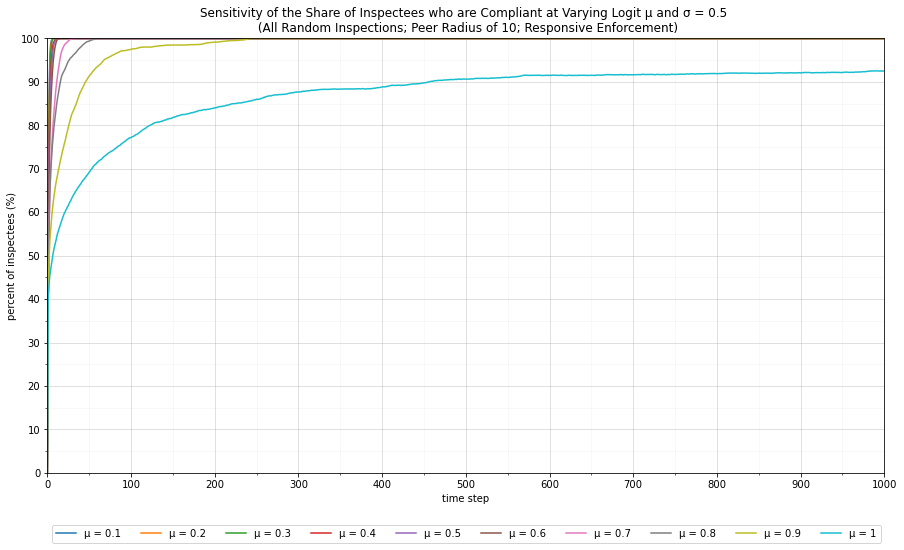

<Figure size 432x288 with 0 Axes>

In [17]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_1_step['step'], responsive_logit_sigma_5_1_step['perc-compliant'], label="μ = 0.1")
plt.plot(responsive_logit_sigma_5_2_step['step'], responsive_logit_sigma_5_2_step['perc-compliant'], label="μ = 0.2")
plt.plot(responsive_logit_sigma_5_3_step['step'], responsive_logit_sigma_5_3_step['perc-compliant'], label="μ = 0.3")
plt.plot(responsive_logit_sigma_5_4_step['step'], responsive_logit_sigma_5_4_step['perc-compliant'], label="μ = 0.4")
plt.plot(responsive_logit_sigma_5_5_step['step'], responsive_logit_sigma_5_5_step['perc-compliant'], label="μ = 0.5")
plt.plot(responsive_logit_sigma_5_6_step['step'], responsive_logit_sigma_5_6_step['perc-compliant'], label="μ = 0.6")
plt.plot(responsive_logit_sigma_5_7_step['step'], responsive_logit_sigma_5_7_step['perc-compliant'], label="μ = 0.7")
plt.plot(responsive_logit_sigma_5_8_step['step'], responsive_logit_sigma_5_8_step['perc-compliant'], label="μ = 0.8")
plt.plot(responsive_logit_sigma_5_9_step['step'], responsive_logit_sigma_5_9_step['perc-compliant'], label="μ = 0.9")
plt.plot(responsive_logit_sigma_5_10_step['step'], responsive_logit_sigma_5_10_step['perc-compliant'], label="μ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Compliant at Varying Logit μ and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Logit sigma 0.5- Time vs Compliant (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_1_step['step'], responsive_logit_sigma_5_1_step['perc-noncompliant'], label="μ = 0.1")
plt.plot(responsive_logit_sigma_5_2_step['step'], responsive_logit_sigma_5_2_step['perc-noncompliant'], label="μ = 0.2")
plt.plot(responsive_logit_sigma_5_3_step['step'], responsive_logit_sigma_5_3_step['perc-noncompliant'], label="μ = 0.3")
plt.plot(responsive_logit_sigma_5_4_step['step'], responsive_logit_sigma_5_4_step['perc-noncompliant'], label="μ = 0.4")
plt.plot(responsive_logit_sigma_5_5_step['step'], responsive_logit_sigma_5_5_step['perc-noncompliant'], label="μ = 0.5")
plt.plot(responsive_logit_sigma_5_6_step['step'], responsive_logit_sigma_5_6_step['perc-noncompliant'], label="μ = 0.6")
plt.plot(responsive_logit_sigma_5_7_step['step'], responsive_logit_sigma_5_7_step['perc-noncompliant'], label="μ = 0.7")
plt.plot(responsive_logit_sigma_5_8_step['step'], responsive_logit_sigma_5_8_step['perc-noncompliant'], label="μ = 0.8")
plt.plot(responsive_logit_sigma_5_9_step['step'], responsive_logit_sigma_5_9_step['perc-noncompliant'], label="μ = 0.9")
plt.plot(responsive_logit_sigma_5_10_step['step'], responsive_logit_sigma_5_10_step['perc-noncompliant'], label="μ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Not Compliant at Varying Logit μ and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Logit sigma 0.5- Time vs Not Compliant (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(responsive_logit_sigma_5_1_step['step'], responsive_logit_sigma_5_1_step['perc-unintentional'], label="μ = 0.1")
plt.plot(responsive_logit_sigma_5_2_step['step'], responsive_logit_sigma_5_2_step['perc-unintentional'], label="μ = 0.2")
plt.plot(responsive_logit_sigma_5_3_step['step'], responsive_logit_sigma_5_3_step['perc-unintentional'], label="μ = 0.3")
plt.plot(responsive_logit_sigma_5_4_step['step'], responsive_logit_sigma_5_4_step['perc-unintentional'], label="μ = 0.4")
plt.plot(responsive_logit_sigma_5_5_step['step'], responsive_logit_sigma_5_5_step['perc-unintentional'], label="μ = 0.5")
plt.plot(responsive_logit_sigma_5_6_step['step'], responsive_logit_sigma_5_6_step['perc-unintentional'], label="μ = 0.6")
plt.plot(responsive_logit_sigma_5_7_step['step'], responsive_logit_sigma_5_7_step['perc-unintentional'], label="μ = 0.7")
plt.plot(responsive_logit_sigma_5_8_step['step'], responsive_logit_sigma_5_8_step['perc-unintentional'], label="μ = 0.8")
plt.plot(responsive_logit_sigma_5_9_step['step'], responsive_logit_sigma_5_9_step['perc-unintentional'], label="μ = 0.9")
plt.plot(responsive_logit_sigma_5_10_step['step'], responsive_logit_sigma_5_10_step['perc-unintentional'], label="μ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Unintentional Violators at Varying Logit μ and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1.501)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Logit sigma 0.5- Time vs Unintentional (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_1_step['step'], responsive_logit_sigma_5_1_step['perc-conscious'], label="μ = 0.1")
plt.plot(responsive_logit_sigma_5_2_step['step'], responsive_logit_sigma_5_2_step['perc-conscious'], label="μ = 0.2")
plt.plot(responsive_logit_sigma_5_3_step['step'], responsive_logit_sigma_5_3_step['perc-conscious'], label="μ = 0.3")
plt.plot(responsive_logit_sigma_5_4_step['step'], responsive_logit_sigma_5_4_step['perc-conscious'], label="μ = 0.4")
plt.plot(responsive_logit_sigma_5_5_step['step'], responsive_logit_sigma_5_5_step['perc-conscious'], label="μ = 0.5")
plt.plot(responsive_logit_sigma_5_6_step['step'], responsive_logit_sigma_5_6_step['perc-conscious'], label="μ = 0.6")
plt.plot(responsive_logit_sigma_5_7_step['step'], responsive_logit_sigma_5_7_step['perc-conscious'], label="μ = 0.7")
plt.plot(responsive_logit_sigma_5_8_step['step'], responsive_logit_sigma_5_8_step['perc-conscious'], label="μ = 0.8")
plt.plot(responsive_logit_sigma_5_9_step['step'], responsive_logit_sigma_5_9_step['perc-conscious'], label="μ = 0.9")
plt.plot(responsive_logit_sigma_5_10_step['step'], responsive_logit_sigma_5_10_step['perc-conscious'], label="μ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Conscious Violators at Varying Logit μ and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Logit sigma 0.5- Time vs Conscious (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(responsive_logit_sigma_5_1_step['step'], responsive_logit_sigma_5_1_step['perc-criminal'], label="μ = 0.1")
plt.plot(responsive_logit_sigma_5_2_step['step'], responsive_logit_sigma_5_2_step['perc-criminal'], label="μ = 0.2")
plt.plot(responsive_logit_sigma_5_3_step['step'], responsive_logit_sigma_5_3_step['perc-criminal'], label="μ = 0.3")
plt.plot(responsive_logit_sigma_5_4_step['step'], responsive_logit_sigma_5_4_step['perc-criminal'], label="μ = 0.4")
plt.plot(responsive_logit_sigma_5_5_step['step'], responsive_logit_sigma_5_5_step['perc-criminal'], label="μ = 0.5")
plt.plot(responsive_logit_sigma_5_6_step['step'], responsive_logit_sigma_5_6_step['perc-criminal'], label="μ = 0.6")
plt.plot(responsive_logit_sigma_5_7_step['step'], responsive_logit_sigma_5_7_step['perc-criminal'], label="μ = 0.7")
plt.plot(responsive_logit_sigma_5_8_step['step'], responsive_logit_sigma_5_8_step['perc-criminal'], label="μ = 0.8")
plt.plot(responsive_logit_sigma_5_9_step['step'], responsive_logit_sigma_5_9_step['perc-criminal'], label="μ = 0.9")
plt.plot(responsive_logit_sigma_5_10_step['step'], responsive_logit_sigma_5_10_step['perc-criminal'], label="μ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Criminal Violators at Varying Logit μ and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1.501)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Logit sigma 0.5- Time vs Criminal (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

## Group data by run and plot results by run

In [ ]:
responsive_logit_sigma_5_1

In [18]:
# Create new dataframes by run_num
for i, x in responsive_logit_sigma_5_1.groupby('run'):
    globals()['responsive_logit_sigma_5_1_' + str(i)] = x
for i, x in responsive_logit_sigma_5_2.groupby('run'):
    globals()['responsive_logit_sigma_5_2_' + str(i)] = x
for i, x in responsive_logit_sigma_5_3.groupby('run'):
    globals()['responsive_logit_sigma_5_3_' + str(i)] = x
for i, x in responsive_logit_sigma_5_4.groupby('run'):
    globals()['responsive_logit_sigma_5_4_' + str(i)] = x
for i, x in responsive_logit_sigma_5_5.groupby('run'):
    globals()['responsive_logit_sigma_5_5_' + str(i)] = x
for i, x in responsive_logit_sigma_5_6.groupby('run'):
    globals()['responsive_logit_sigma_5_6_' + str(i)] = x
for i, x in responsive_logit_sigma_5_7.groupby('run'):
    globals()['responsive_logit_sigma_5_7_' + str(i)] = x
for i, x in responsive_logit_sigma_5_8.groupby('run'):
    globals()['responsive_logit_sigma_5_8_' + str(i)] = x
for i, x in responsive_logit_sigma_5_9.groupby('run'):
    globals()['responsive_logit_sigma_5_9_' + str(i)] = x
for i, x in responsive_logit_sigma_5_10.groupby('run'):
    globals()['responsive_logit_sigma_5_10_' + str(i)] = x

### Vary Mu

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_1_161['step'],responsive_logit_sigma_5_1_161['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_1_162['step'],responsive_logit_sigma_5_1_162['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_1_163['step'],responsive_logit_sigma_5_1_163['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_1_164['step'],responsive_logit_sigma_5_1_164['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_1_165['step'],responsive_logit_sigma_5_1_165['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_1_166['step'],responsive_logit_sigma_5_1_166['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_1_167['step'],responsive_logit_sigma_5_1_167['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_1_168['step'],responsive_logit_sigma_5_1_168['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_1_169['step'],responsive_logit_sigma_5_1_169['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_1_170['step'],responsive_logit_sigma_5_1_170['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.1 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

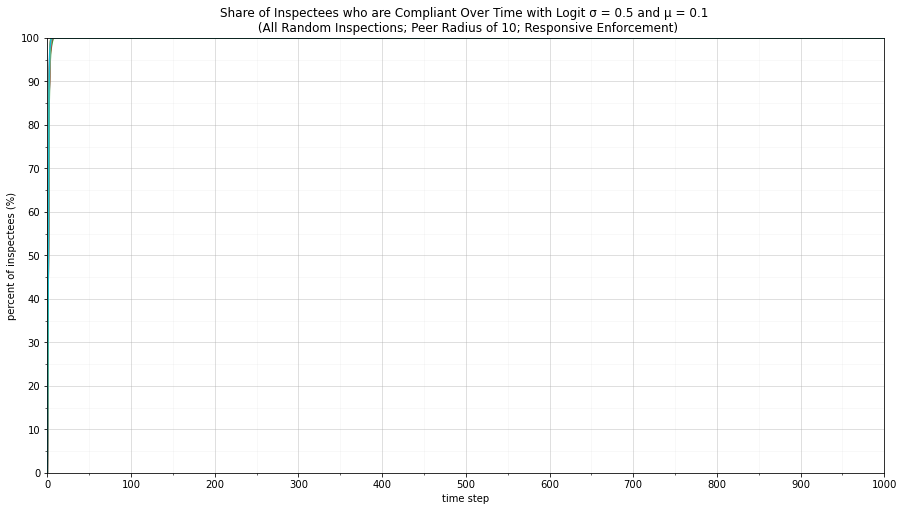

<Figure size 432x288 with 0 Axes>

In [19]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_1_161['step'],responsive_logit_sigma_5_1_161['perc-compliant'])
plt.plot(responsive_logit_sigma_5_1_162['step'],responsive_logit_sigma_5_1_162['perc-compliant'])
plt.plot(responsive_logit_sigma_5_1_163['step'],responsive_logit_sigma_5_1_163['perc-compliant'])
plt.plot(responsive_logit_sigma_5_1_164['step'],responsive_logit_sigma_5_1_164['perc-compliant'])
plt.plot(responsive_logit_sigma_5_1_165['step'],responsive_logit_sigma_5_1_165['perc-compliant'])
plt.plot(responsive_logit_sigma_5_1_166['step'],responsive_logit_sigma_5_1_166['perc-compliant'])
plt.plot(responsive_logit_sigma_5_1_167['step'],responsive_logit_sigma_5_1_167['perc-compliant'])
plt.plot(responsive_logit_sigma_5_1_168['step'],responsive_logit_sigma_5_1_168['perc-compliant'])
plt.plot(responsive_logit_sigma_5_1_169['step'],responsive_logit_sigma_5_1_169['perc-compliant'])
plt.plot(responsive_logit_sigma_5_1_170['step'],responsive_logit_sigma_5_1_170['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.1 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_2_271['step'],responsive_logit_sigma_5_2_271['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_2_272['step'],responsive_logit_sigma_5_2_272['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_2_273['step'],responsive_logit_sigma_5_2_273['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_2_274['step'],responsive_logit_sigma_5_2_274['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_2_275['step'],responsive_logit_sigma_5_2_275['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_2_276['step'],responsive_logit_sigma_5_2_276['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_2_277['step'],responsive_logit_sigma_5_2_277['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_2_278['step'],responsive_logit_sigma_5_2_278['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_2_279['step'],responsive_logit_sigma_5_2_279['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_2_280['step'],responsive_logit_sigma_5_2_280['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.2 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.2 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_2_271['step'],responsive_logit_sigma_5_2_271['perc-compliant'])
plt.plot(responsive_logit_sigma_5_2_272['step'],responsive_logit_sigma_5_2_272['perc-compliant'])
plt.plot(responsive_logit_sigma_5_2_273['step'],responsive_logit_sigma_5_2_273['perc-compliant'])
plt.plot(responsive_logit_sigma_5_2_274['step'],responsive_logit_sigma_5_2_274['perc-compliant'])
plt.plot(responsive_logit_sigma_5_2_275['step'],responsive_logit_sigma_5_2_275['perc-compliant'])
plt.plot(responsive_logit_sigma_5_2_276['step'],responsive_logit_sigma_5_2_276['perc-compliant'])
plt.plot(responsive_logit_sigma_5_2_277['step'],responsive_logit_sigma_5_2_277['perc-compliant'])
plt.plot(responsive_logit_sigma_5_2_278['step'],responsive_logit_sigma_5_2_278['perc-compliant'])
plt.plot(responsive_logit_sigma_5_2_279['step'],responsive_logit_sigma_5_2_279['perc-compliant'])
plt.plot(responsive_logit_sigma_5_2_280['step'],responsive_logit_sigma_5_2_280['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.2 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.2 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
responsive_logit_sigma_5_3

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_3_381['step'],responsive_logit_sigma_5_3_381['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_3_382['step'],responsive_logit_sigma_5_3_382['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_3_383['step'],responsive_logit_sigma_5_3_383['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_3_384['step'],responsive_logit_sigma_5_3_384['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_3_385['step'],responsive_logit_sigma_5_3_385['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_3_386['step'],responsive_logit_sigma_5_3_386['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_3_387['step'],responsive_logit_sigma_5_3_387['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_3_388['step'],responsive_logit_sigma_5_3_388['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_3_389['step'],responsive_logit_sigma_5_3_389['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_3_390['step'],responsive_logit_sigma_5_3_390['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.3 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.3 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_3_381['step'],responsive_logit_sigma_5_3_381['perc-compliant'])
plt.plot(responsive_logit_sigma_5_3_382['step'],responsive_logit_sigma_5_3_382['perc-compliant'])
plt.plot(responsive_logit_sigma_5_3_383['step'],responsive_logit_sigma_5_3_383['perc-compliant'])
plt.plot(responsive_logit_sigma_5_3_384['step'],responsive_logit_sigma_5_3_384['perc-compliant'])
plt.plot(responsive_logit_sigma_5_3_385['step'],responsive_logit_sigma_5_3_385['perc-compliant'])
plt.plot(responsive_logit_sigma_5_3_386['step'],responsive_logit_sigma_5_3_386['perc-compliant'])
plt.plot(responsive_logit_sigma_5_3_387['step'],responsive_logit_sigma_5_3_387['perc-compliant'])
plt.plot(responsive_logit_sigma_5_3_388['step'],responsive_logit_sigma_5_3_388['perc-compliant'])
plt.plot(responsive_logit_sigma_5_3_389['step'],responsive_logit_sigma_5_3_389['perc-compliant'])
plt.plot(responsive_logit_sigma_5_3_390['step'],responsive_logit_sigma_5_3_390['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.3 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.3 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_4_491['step'],responsive_logit_sigma_5_4_491['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_4_492['step'],responsive_logit_sigma_5_4_492['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_4_493['step'],responsive_logit_sigma_5_4_493['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_4_494['step'],responsive_logit_sigma_5_4_494['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_4_495['step'],responsive_logit_sigma_5_4_495['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_4_496['step'],responsive_logit_sigma_5_4_496['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_4_497['step'],responsive_logit_sigma_5_4_497['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_4_498['step'],responsive_logit_sigma_5_4_498['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_4_499['step'],responsive_logit_sigma_5_4_499['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_4_500['step'],responsive_logit_sigma_5_4_500['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.4 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.4 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_4_491['step'],responsive_logit_sigma_5_4_491['perc-compliant'])
plt.plot(responsive_logit_sigma_5_4_492['step'],responsive_logit_sigma_5_4_492['perc-compliant'])
plt.plot(responsive_logit_sigma_5_4_493['step'],responsive_logit_sigma_5_4_493['perc-compliant'])
plt.plot(responsive_logit_sigma_5_4_494['step'],responsive_logit_sigma_5_4_494['perc-compliant'])
plt.plot(responsive_logit_sigma_5_4_495['step'],responsive_logit_sigma_5_4_495['perc-compliant'])
plt.plot(responsive_logit_sigma_5_4_496['step'],responsive_logit_sigma_5_4_496['perc-compliant'])
plt.plot(responsive_logit_sigma_5_4_497['step'],responsive_logit_sigma_5_4_497['perc-compliant'])
plt.plot(responsive_logit_sigma_5_4_498['step'],responsive_logit_sigma_5_4_498['perc-compliant'])
plt.plot(responsive_logit_sigma_5_4_499['step'],responsive_logit_sigma_5_4_499['perc-compliant'])
plt.plot(responsive_logit_sigma_5_4_500['step'],responsive_logit_sigma_5_4_500['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.4 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.4 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_5_601['step'],responsive_logit_sigma_5_5_601['perc-compliant'])
plt.plot(responsive_logit_sigma_5_5_602['step'],responsive_logit_sigma_5_5_602['perc-compliant'])
plt.plot(responsive_logit_sigma_5_5_603['step'],responsive_logit_sigma_5_5_603['perc-compliant'])
plt.plot(responsive_logit_sigma_5_5_604['step'],responsive_logit_sigma_5_5_604['perc-compliant'])
plt.plot(responsive_logit_sigma_5_5_605['step'],responsive_logit_sigma_5_5_605['perc-compliant'])
plt.plot(responsive_logit_sigma_5_5_606['step'],responsive_logit_sigma_5_5_606['perc-compliant'])
plt.plot(responsive_logit_sigma_5_5_607['step'],responsive_logit_sigma_5_5_607['perc-compliant'])
plt.plot(responsive_logit_sigma_5_5_608['step'],responsive_logit_sigma_5_5_608['perc-compliant'])
plt.plot(responsive_logit_sigma_5_5_609['step'],responsive_logit_sigma_5_5_609['perc-compliant'])
plt.plot(responsive_logit_sigma_5_5_610['step'],responsive_logit_sigma_5_5_610['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.5 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_5_601['step'],responsive_logit_sigma_5_5_601['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_5_602['step'],responsive_logit_sigma_5_5_602['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_5_603['step'],responsive_logit_sigma_5_5_603['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_5_604['step'],responsive_logit_sigma_5_5_604['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_5_605['step'],responsive_logit_sigma_5_5_605['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_5_606['step'],responsive_logit_sigma_5_5_606['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_5_607['step'],responsive_logit_sigma_5_5_607['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_5_608['step'],responsive_logit_sigma_5_5_608['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_5_609['step'],responsive_logit_sigma_5_5_609['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_5_610['step'],responsive_logit_sigma_5_5_610['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.5 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_6_711['step'],responsive_logit_sigma_5_6_711['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_6_712['step'],responsive_logit_sigma_5_6_712['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_6_713['step'],responsive_logit_sigma_5_6_713['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_6_714['step'],responsive_logit_sigma_5_6_714['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_6_715['step'],responsive_logit_sigma_5_6_715['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_6_716['step'],responsive_logit_sigma_5_6_716['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_6_717['step'],responsive_logit_sigma_5_6_717['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_6_718['step'],responsive_logit_sigma_5_6_718['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_6_719['step'],responsive_logit_sigma_5_6_719['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_6_720['step'],responsive_logit_sigma_5_6_720['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.6 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.6 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_6_711['step'],responsive_logit_sigma_5_6_711['perc-compliant'])
plt.plot(responsive_logit_sigma_5_6_712['step'],responsive_logit_sigma_5_6_712['perc-compliant'])
plt.plot(responsive_logit_sigma_5_6_713['step'],responsive_logit_sigma_5_6_713['perc-compliant'])
plt.plot(responsive_logit_sigma_5_6_714['step'],responsive_logit_sigma_5_6_714['perc-compliant'])
plt.plot(responsive_logit_sigma_5_6_715['step'],responsive_logit_sigma_5_6_715['perc-compliant'])
plt.plot(responsive_logit_sigma_5_6_716['step'],responsive_logit_sigma_5_6_716['perc-compliant'])
plt.plot(responsive_logit_sigma_5_6_717['step'],responsive_logit_sigma_5_6_717['perc-compliant'])
plt.plot(responsive_logit_sigma_5_6_718['step'],responsive_logit_sigma_5_6_718['perc-compliant'])
plt.plot(responsive_logit_sigma_5_6_719['step'],responsive_logit_sigma_5_6_719['perc-compliant'])
plt.plot(responsive_logit_sigma_5_6_720['step'],responsive_logit_sigma_5_6_720['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.6 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.6 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_7_821['step'],responsive_logit_sigma_5_7_821['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_7_822['step'],responsive_logit_sigma_5_7_822['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_7_823['step'],responsive_logit_sigma_5_7_823['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_7_824['step'],responsive_logit_sigma_5_7_824['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_7_825['step'],responsive_logit_sigma_5_7_825['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_7_826['step'],responsive_logit_sigma_5_7_826['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_7_827['step'],responsive_logit_sigma_5_7_827['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_7_828['step'],responsive_logit_sigma_5_7_828['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_7_829['step'],responsive_logit_sigma_5_7_829['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_7_830['step'],responsive_logit_sigma_5_7_830['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.7 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.7 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

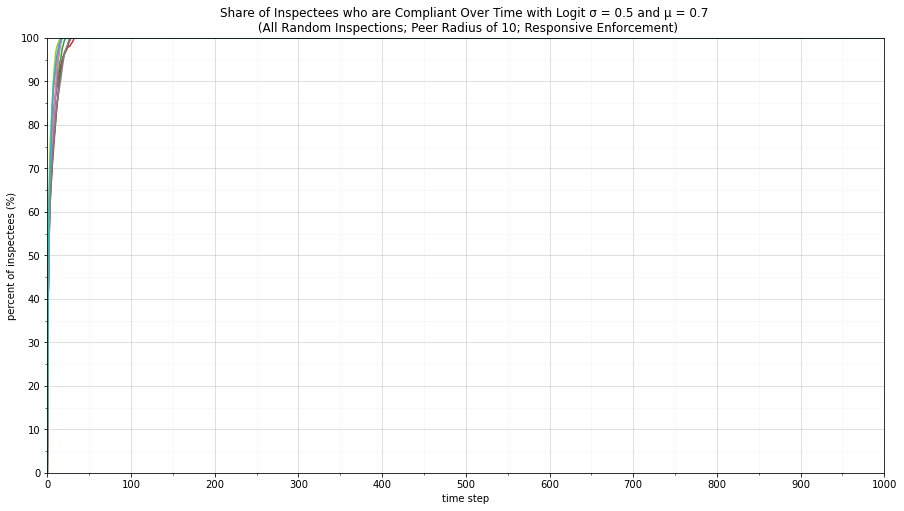

<Figure size 432x288 with 0 Axes>

In [40]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_7_821['step'],responsive_logit_sigma_5_7_821['perc-compliant'])
plt.plot(responsive_logit_sigma_5_7_822['step'],responsive_logit_sigma_5_7_822['perc-compliant'])
plt.plot(responsive_logit_sigma_5_7_823['step'],responsive_logit_sigma_5_7_823['perc-compliant'])
plt.plot(responsive_logit_sigma_5_7_824['step'],responsive_logit_sigma_5_7_824['perc-compliant'])
plt.plot(responsive_logit_sigma_5_7_825['step'],responsive_logit_sigma_5_7_825['perc-compliant'])
plt.plot(responsive_logit_sigma_5_7_826['step'],responsive_logit_sigma_5_7_826['perc-compliant'])
plt.plot(responsive_logit_sigma_5_7_827['step'],responsive_logit_sigma_5_7_827['perc-compliant'])
plt.plot(responsive_logit_sigma_5_7_828['step'],responsive_logit_sigma_5_7_828['perc-compliant'])
plt.plot(responsive_logit_sigma_5_7_829['step'],responsive_logit_sigma_5_7_829['perc-compliant'])
plt.plot(responsive_logit_sigma_5_7_830['step'],responsive_logit_sigma_5_7_830['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.7 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.7 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_8_931['step'],responsive_logit_sigma_5_8_931['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_8_932['step'],responsive_logit_sigma_5_8_932['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_8_933['step'],responsive_logit_sigma_5_8_933['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_8_934['step'],responsive_logit_sigma_5_8_934['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_8_935['step'],responsive_logit_sigma_5_8_935['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_8_936['step'],responsive_logit_sigma_5_8_936['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_8_937['step'],responsive_logit_sigma_5_8_937['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_8_938['step'],responsive_logit_sigma_5_8_938['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_8_939['step'],responsive_logit_sigma_5_8_939['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_8_940['step'],responsive_logit_sigma_5_8_940['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.8 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.8 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

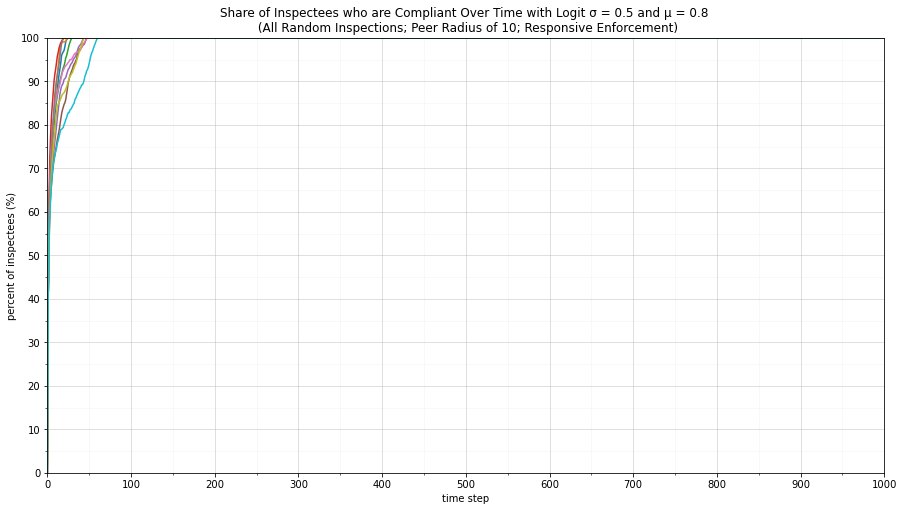

<Figure size 432x288 with 0 Axes>

In [21]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_8_931['step'],responsive_logit_sigma_5_8_931['perc-compliant'])
plt.plot(responsive_logit_sigma_5_8_932['step'],responsive_logit_sigma_5_8_932['perc-compliant'])
plt.plot(responsive_logit_sigma_5_8_933['step'],responsive_logit_sigma_5_8_933['perc-compliant'])
plt.plot(responsive_logit_sigma_5_8_934['step'],responsive_logit_sigma_5_8_934['perc-compliant'])
plt.plot(responsive_logit_sigma_5_8_935['step'],responsive_logit_sigma_5_8_935['perc-compliant'])
plt.plot(responsive_logit_sigma_5_8_936['step'],responsive_logit_sigma_5_8_936['perc-compliant'])
plt.plot(responsive_logit_sigma_5_8_937['step'],responsive_logit_sigma_5_8_937['perc-compliant'])
plt.plot(responsive_logit_sigma_5_8_938['step'],responsive_logit_sigma_5_8_938['perc-compliant'])
plt.plot(responsive_logit_sigma_5_8_939['step'],responsive_logit_sigma_5_8_939['perc-compliant'])
plt.plot(responsive_logit_sigma_5_8_940['step'],responsive_logit_sigma_5_8_940['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.8 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.8 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_9_1041['step'],responsive_logit_sigma_5_9_1041['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_9_1042['step'],responsive_logit_sigma_5_9_1042['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_9_1043['step'],responsive_logit_sigma_5_9_1043['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_9_1044['step'],responsive_logit_sigma_5_9_1044['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_9_1045['step'],responsive_logit_sigma_5_9_1045['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_9_1046['step'],responsive_logit_sigma_5_9_1046['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_9_1047['step'],responsive_logit_sigma_5_9_1047['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_9_1048['step'],responsive_logit_sigma_5_9_1048['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_9_1049['step'],responsive_logit_sigma_5_9_1049['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_9_1050['step'],responsive_logit_sigma_5_9_1050['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.9 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.9 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

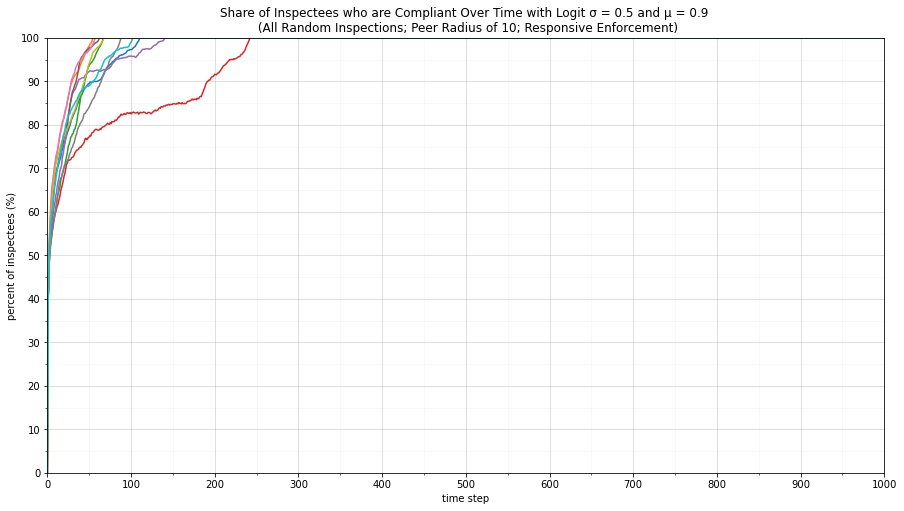

<Figure size 432x288 with 0 Axes>

In [22]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_9_1041['step'],responsive_logit_sigma_5_9_1041['perc-compliant'])
plt.plot(responsive_logit_sigma_5_9_1042['step'],responsive_logit_sigma_5_9_1042['perc-compliant'])
plt.plot(responsive_logit_sigma_5_9_1043['step'],responsive_logit_sigma_5_9_1043['perc-compliant'])
plt.plot(responsive_logit_sigma_5_9_1044['step'],responsive_logit_sigma_5_9_1044['perc-compliant'])
plt.plot(responsive_logit_sigma_5_9_1045['step'],responsive_logit_sigma_5_9_1045['perc-compliant'])
plt.plot(responsive_logit_sigma_5_9_1046['step'],responsive_logit_sigma_5_9_1046['perc-compliant'])
plt.plot(responsive_logit_sigma_5_9_1047['step'],responsive_logit_sigma_5_9_1047['perc-compliant'])
plt.plot(responsive_logit_sigma_5_9_1048['step'],responsive_logit_sigma_5_9_1048['perc-compliant'])
plt.plot(responsive_logit_sigma_5_9_1049['step'],responsive_logit_sigma_5_9_1049['perc-compliant'])
plt.plot(responsive_logit_sigma_5_9_1050['step'],responsive_logit_sigma_5_9_1050['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.9 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.9 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_10_1151['step'],responsive_logit_sigma_5_10_1151['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_10_1152['step'],responsive_logit_sigma_5_10_1152['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_10_1153['step'],responsive_logit_sigma_5_10_1153['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_10_1154['step'],responsive_logit_sigma_5_10_1154['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_10_1155['step'],responsive_logit_sigma_5_10_1155['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_10_1156['step'],responsive_logit_sigma_5_10_1156['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_10_1157['step'],responsive_logit_sigma_5_10_1157['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_10_1158['step'],responsive_logit_sigma_5_10_1158['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_10_1159['step'],responsive_logit_sigma_5_10_1159['avg-compliance-rate'])
plt.plot(responsive_logit_sigma_5_10_1160['step'],responsive_logit_sigma_5_10_1160['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=1 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

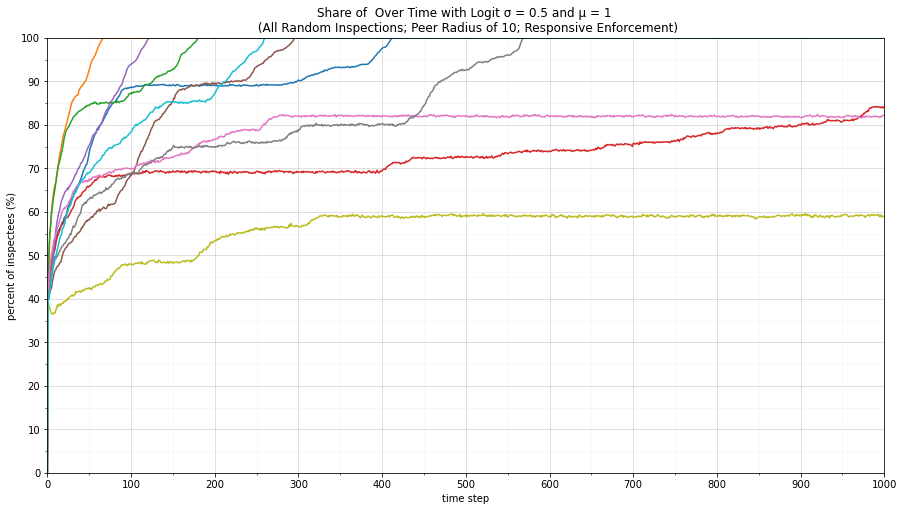

<Figure size 432x288 with 0 Axes>

In [24]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_sigma_5_10_1151['step'],responsive_logit_sigma_5_10_1151['perc-compliant'])
plt.plot(responsive_logit_sigma_5_10_1152['step'],responsive_logit_sigma_5_10_1152['perc-compliant'])
plt.plot(responsive_logit_sigma_5_10_1153['step'],responsive_logit_sigma_5_10_1153['perc-compliant'])
plt.plot(responsive_logit_sigma_5_10_1154['step'],responsive_logit_sigma_5_10_1154['perc-compliant'])
plt.plot(responsive_logit_sigma_5_10_1155['step'],responsive_logit_sigma_5_10_1155['perc-compliant'])
plt.plot(responsive_logit_sigma_5_10_1156['step'],responsive_logit_sigma_5_10_1156['perc-compliant'])
plt.plot(responsive_logit_sigma_5_10_1157['step'],responsive_logit_sigma_5_10_1157['perc-compliant'])
plt.plot(responsive_logit_sigma_5_10_1158['step'],responsive_logit_sigma_5_10_1158['perc-compliant'])
plt.plot(responsive_logit_sigma_5_10_1159['step'],responsive_logit_sigma_5_10_1159['perc-compliant'])
plt.plot(responsive_logit_sigma_5_10_1160['step'],responsive_logit_sigma_5_10_1160['perc-compliant'])

plt.title("Share of  Over Time with Logit σ = 0.5 and μ = 1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=1 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

### Vary Sigma

In [ ]:
responsive_logit_mu_10_2

In [26]:
# Create new dataframes by run_num
for i, x in responsive_logit_mu_10_1.groupby('run'):
    globals()['responsive_logit_mu_10_1_' + str(i)] = x
for i, x in responsive_logit_mu_10_2.groupby('run'):
    globals()['responsive_logit_mu_10_2_' + str(i)] = x
for i, x in responsive_logit_mu_10_3.groupby('run'):
    globals()['responsive_logit_mu_10_3_' + str(i)] = x
for i, x in responsive_logit_mu_10_4.groupby('run'):
    globals()['responsive_logit_mu_10_4_' + str(i)] = x
for i, x in responsive_logit_mu_10_5.groupby('run'):
    globals()['responsive_logit_mu_10_5_' + str(i)] = x
for i, x in responsive_logit_mu_10_6.groupby('run'):
    globals()['responsive_logit_mu_10_6_' + str(i)] = x
for i, x in responsive_logit_mu_10_7.groupby('run'):
    globals()['responsive_logit_mu_10_7_' + str(i)] = x
for i, x in responsive_logit_mu_10_8.groupby('run'):
    globals()['responsive_logit_mu_10_8_' + str(i)] = x
for i, x in responsive_logit_mu_10_9.groupby('run'):
    globals()['responsive_logit_mu_10_9_' + str(i)] = x
for i, x in responsive_logit_mu_10_10.groupby('run'):
    globals()['responsive_logit_mu_10_10_' + str(i)] = x

In [ ]:
responsive_logit_mu_10_1

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_1_1111['step'],responsive_logit_mu_10_1_1111['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_1_1112['step'],responsive_logit_mu_10_1_1112['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_1_1113['step'],responsive_logit_mu_10_1_1113['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_1_1114['step'],responsive_logit_mu_10_1_1114['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_1_1115['step'],responsive_logit_mu_10_1_1115['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_1_1116['step'],responsive_logit_mu_10_1_1116['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_1_1117['step'],responsive_logit_mu_10_1_1117['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_1_1118['step'],responsive_logit_mu_10_1_1118['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_1_1119['step'],responsive_logit_mu_10_1_1119['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_1_1120['step'],responsive_logit_mu_10_1_1120['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.1 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

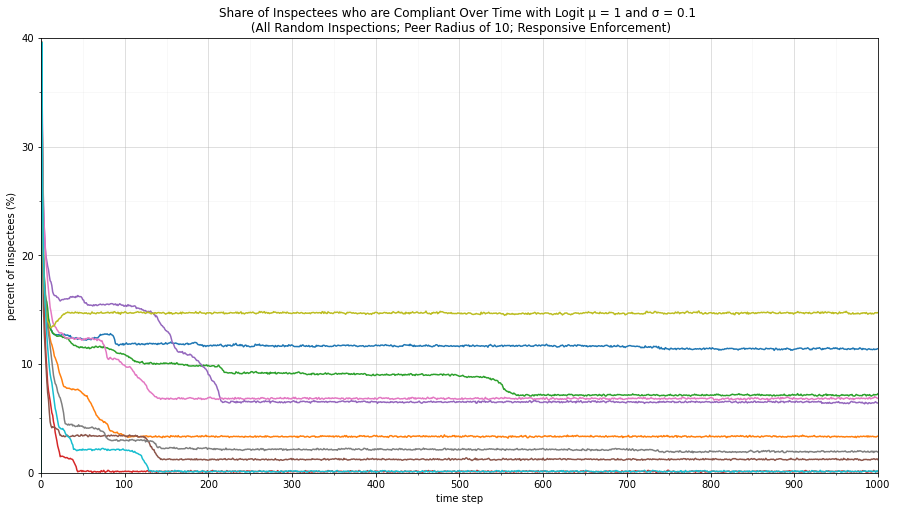

<Figure size 432x288 with 0 Axes>

In [27]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(responsive_logit_mu_10_1_1111['step'],responsive_logit_mu_10_1_1111['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1112['step'],responsive_logit_mu_10_1_1112['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1113['step'],responsive_logit_mu_10_1_1113['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1114['step'],responsive_logit_mu_10_1_1114['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1115['step'],responsive_logit_mu_10_1_1115['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1116['step'],responsive_logit_mu_10_1_1116['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1117['step'],responsive_logit_mu_10_1_1117['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1118['step'],responsive_logit_mu_10_1_1118['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1119['step'],responsive_logit_mu_10_1_1119['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1120['step'],responsive_logit_mu_10_1_1120['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.1 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
responsive_logit_mu_10_2

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_2_1121['step'],responsive_logit_mu_10_2_1121['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_2_1122['step'],responsive_logit_mu_10_2_1122['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_2_1123['step'],responsive_logit_mu_10_2_1123['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_2_1124['step'],responsive_logit_mu_10_2_1124['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_2_1125['step'],responsive_logit_mu_10_2_1125['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_2_1126['step'],responsive_logit_mu_10_2_1126['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_2_1127['step'],responsive_logit_mu_10_2_1127['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_2_1128['step'],responsive_logit_mu_10_2_1128['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_2_1129['step'],responsive_logit_mu_10_2_1129['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_2_1130['step'],responsive_logit_mu_10_2_1130['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.2 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.2 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

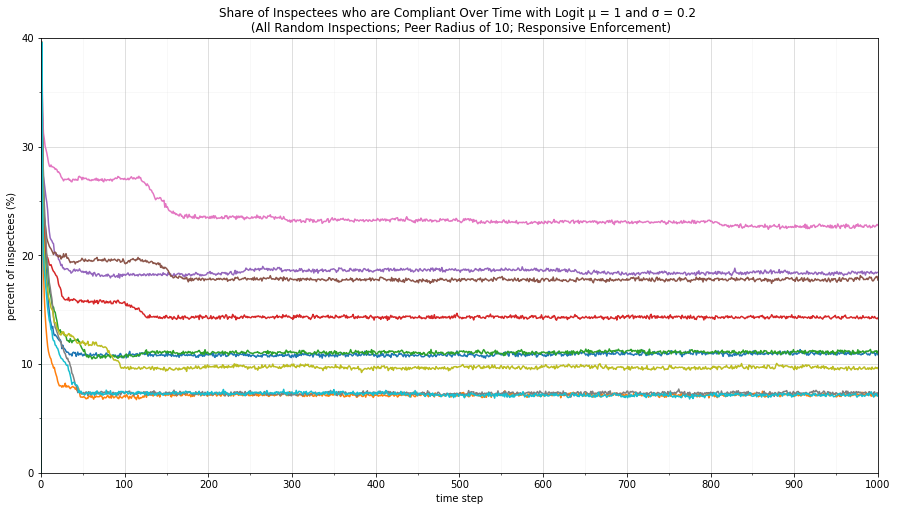

<Figure size 432x288 with 0 Axes>

In [28]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(responsive_logit_mu_10_2_1121['step'],responsive_logit_mu_10_2_1121['perc-compliant'])
plt.plot(responsive_logit_mu_10_2_1122['step'],responsive_logit_mu_10_2_1122['perc-compliant'])
plt.plot(responsive_logit_mu_10_2_1123['step'],responsive_logit_mu_10_2_1123['perc-compliant'])
plt.plot(responsive_logit_mu_10_2_1124['step'],responsive_logit_mu_10_2_1124['perc-compliant'])
plt.plot(responsive_logit_mu_10_2_1125['step'],responsive_logit_mu_10_2_1125['perc-compliant'])
plt.plot(responsive_logit_mu_10_2_1126['step'],responsive_logit_mu_10_2_1126['perc-compliant'])
plt.plot(responsive_logit_mu_10_2_1127['step'],responsive_logit_mu_10_2_1127['perc-compliant'])
plt.plot(responsive_logit_mu_10_2_1128['step'],responsive_logit_mu_10_2_1128['perc-compliant'])
plt.plot(responsive_logit_mu_10_2_1129['step'],responsive_logit_mu_10_2_1129['perc-compliant'])
plt.plot(responsive_logit_mu_10_2_1130['step'],responsive_logit_mu_10_2_1130['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.2 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.2 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_3_1131['step'],responsive_logit_mu_10_3_1131['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_3_1132['step'],responsive_logit_mu_10_3_1132['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_3_1133['step'],responsive_logit_mu_10_3_1133['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_3_1134['step'],responsive_logit_mu_10_3_1134['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_3_1135['step'],responsive_logit_mu_10_3_1135['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_3_1136['step'],responsive_logit_mu_10_3_1136['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_3_1137['step'],responsive_logit_mu_10_3_1137['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_3_1138['step'],responsive_logit_mu_10_3_1138['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_3_1139['step'],responsive_logit_mu_10_3_1139['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_3_1140['step'],responsive_logit_mu_10_3_1140['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.3 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.3 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_4_1141['step'],responsive_logit_mu_10_4_1141['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_4_1142['step'],responsive_logit_mu_10_4_1142['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_4_1143['step'],responsive_logit_mu_10_4_1143['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_4_1144['step'],responsive_logit_mu_10_4_1144['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_4_1145['step'],responsive_logit_mu_10_4_1145['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_4_1146['step'],responsive_logit_mu_10_4_1146['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_4_1147['step'],responsive_logit_mu_10_4_1147['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_4_1148['step'],responsive_logit_mu_10_4_1148['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_4_1149['step'],responsive_logit_mu_10_4_1149['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_4_1150['step'],responsive_logit_mu_10_4_1150['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.4 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.4 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_5_1151['step'],responsive_logit_mu_10_5_1151['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_5_1152['step'],responsive_logit_mu_10_5_1152['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_5_1153['step'],responsive_logit_mu_10_5_1153['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_5_1154['step'],responsive_logit_mu_10_5_1154['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_5_1155['step'],responsive_logit_mu_10_5_1155['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_5_1156['step'],responsive_logit_mu_10_5_1156['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_5_1157['step'],responsive_logit_mu_10_5_1157['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_5_1158['step'],responsive_logit_mu_10_5_1158['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_5_1159['step'],responsive_logit_mu_10_5_1159['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_5_1160['step'],responsive_logit_mu_10_5_1160['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.5 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_6_1161['step'],responsive_logit_mu_10_6_1161['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_6_1162['step'],responsive_logit_mu_10_6_1162['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_6_1163['step'],responsive_logit_mu_10_6_1163['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_6_1164['step'],responsive_logit_mu_10_6_1164['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_6_1165['step'],responsive_logit_mu_10_6_1165['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_6_1166['step'],responsive_logit_mu_10_6_1166['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_6_1167['step'],responsive_logit_mu_10_6_1167['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_6_1168['step'],responsive_logit_mu_10_6_1168['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_6_1169['step'],responsive_logit_mu_10_6_1169['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_6_1170['step'],responsive_logit_mu_10_6_1170['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.6 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.6 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_7_1171['step'],responsive_logit_mu_10_7_1171['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_7_1172['step'],responsive_logit_mu_10_7_1172['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_7_1173['step'],responsive_logit_mu_10_7_1173['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_7_1174['step'],responsive_logit_mu_10_7_1174['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_7_1175['step'],responsive_logit_mu_10_7_1175['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_7_1176['step'],responsive_logit_mu_10_7_1176['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_7_1177['step'],responsive_logit_mu_10_7_1177['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_7_1178['step'],responsive_logit_mu_10_7_1178['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_7_1179['step'],responsive_logit_mu_10_7_1179['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_7_1180['step'],responsive_logit_mu_10_7_1180['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.7 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.7 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_8_1181['step'],responsive_logit_mu_10_8_1181['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_8_1182['step'],responsive_logit_mu_10_8_1182['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_8_1183['step'],responsive_logit_mu_10_8_1183['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_8_1184['step'],responsive_logit_mu_10_8_1184['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_8_1185['step'],responsive_logit_mu_10_8_1185['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_8_1186['step'],responsive_logit_mu_10_8_1186['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_8_1187['step'],responsive_logit_mu_10_8_1187['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_8_1188['step'],responsive_logit_mu_10_8_1188['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_8_1189['step'],responsive_logit_mu_10_8_1189['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_8_1190['step'],responsive_logit_mu_10_8_1190['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.8 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.8 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_9_1191['step'],responsive_logit_mu_10_9_1191['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_9_1192['step'],responsive_logit_mu_10_9_1192['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_9_1193['step'],responsive_logit_mu_10_9_1193['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_9_1194['step'],responsive_logit_mu_10_9_1194['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_9_1195['step'],responsive_logit_mu_10_9_1195['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_9_1196['step'],responsive_logit_mu_10_9_1196['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_9_1197['step'],responsive_logit_mu_10_9_1197['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_9_1198['step'],responsive_logit_mu_10_9_1198['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_9_1199['step'],responsive_logit_mu_10_9_1199['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_9_1200['step'],responsive_logit_mu_10_9_1200['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.9 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.9 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_10_1201['step'],responsive_logit_mu_10_10_1201['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_10_1202['step'],responsive_logit_mu_10_10_1202['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_10_1203['step'],responsive_logit_mu_10_10_1203['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_10_1204['step'],responsive_logit_mu_10_10_1204['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_10_1205['step'],responsive_logit_mu_10_10_1205['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_10_1206['step'],responsive_logit_mu_10_10_1206['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_10_1207['step'],responsive_logit_mu_10_10_1207['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_10_1208['step'],responsive_logit_mu_10_10_1208['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_10_1209['step'],responsive_logit_mu_10_10_1209['avg-compliance-rate'])
plt.plot(responsive_logit_mu_10_10_1210['step'],responsive_logit_mu_10_10_1210['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=1 Time vs Avg Compliance All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(responsive_logit_mu_10_1_1111['step'],responsive_logit_mu_10_1_1111['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1112['step'],responsive_logit_mu_10_1_1112['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1113['step'],responsive_logit_mu_10_1_1113['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1114['step'],responsive_logit_mu_10_1_1114['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1115['step'],responsive_logit_mu_10_1_1115['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1116['step'],responsive_logit_mu_10_1_1116['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1117['step'],responsive_logit_mu_10_1_1117['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1118['step'],responsive_logit_mu_10_1_1118['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1119['step'],responsive_logit_mu_10_1_1119['perc-compliant'])
plt.plot(responsive_logit_mu_10_1_1120['step'],responsive_logit_mu_10_1_1120['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectes (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.1 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

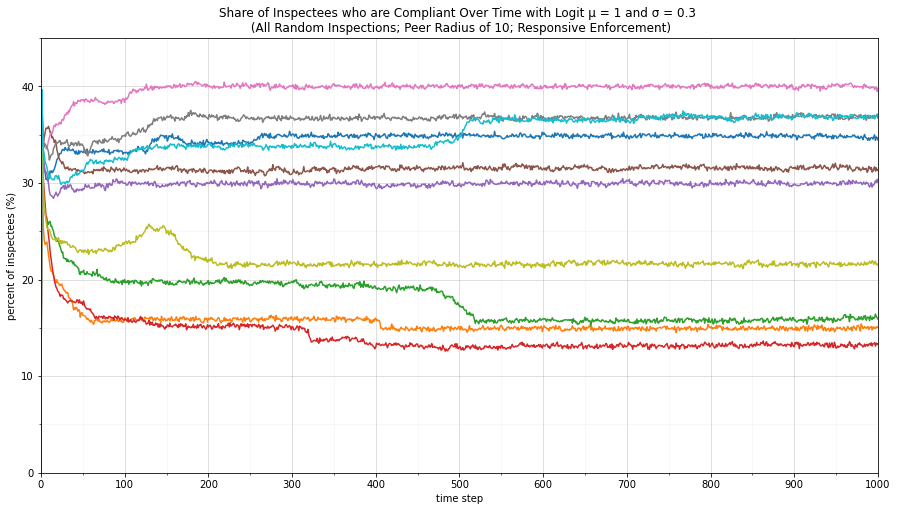

<Figure size 432x288 with 0 Axes>

In [30]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,45.1,10))
ax.set_yticks(np.arange(0,45.1,5), minor=True)

plt.plot(responsive_logit_mu_10_3_1131['step'],responsive_logit_mu_10_3_1131['perc-compliant'])
plt.plot(responsive_logit_mu_10_3_1132['step'],responsive_logit_mu_10_3_1132['perc-compliant'])
plt.plot(responsive_logit_mu_10_3_1133['step'],responsive_logit_mu_10_3_1133['perc-compliant'])
plt.plot(responsive_logit_mu_10_3_1134['step'],responsive_logit_mu_10_3_1134['perc-compliant'])
plt.plot(responsive_logit_mu_10_3_1135['step'],responsive_logit_mu_10_3_1135['perc-compliant'])
plt.plot(responsive_logit_mu_10_3_1136['step'],responsive_logit_mu_10_3_1136['perc-compliant'])
plt.plot(responsive_logit_mu_10_3_1137['step'],responsive_logit_mu_10_3_1137['perc-compliant'])
plt.plot(responsive_logit_mu_10_3_1138['step'],responsive_logit_mu_10_3_1138['perc-compliant'])
plt.plot(responsive_logit_mu_10_3_1139['step'],responsive_logit_mu_10_3_1139['perc-compliant'])
plt.plot(responsive_logit_mu_10_3_1140['step'],responsive_logit_mu_10_3_1140['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.3 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,45.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.3 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

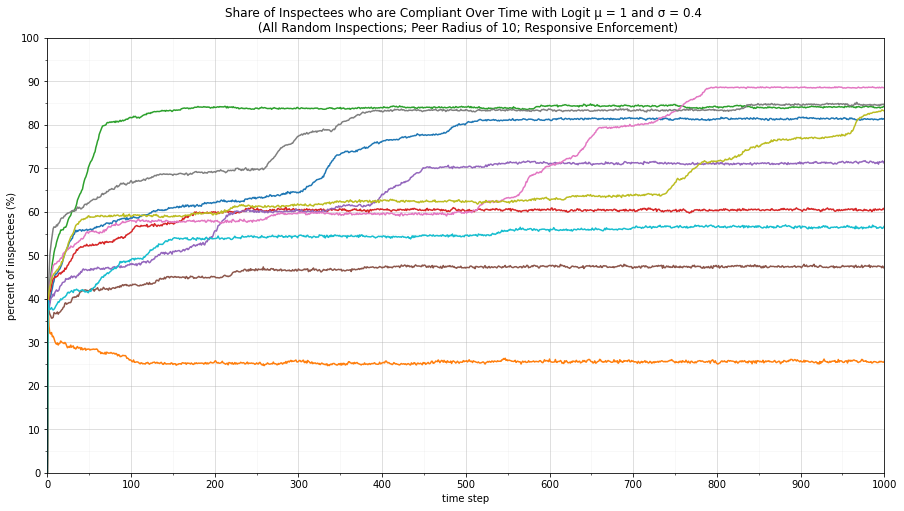

<Figure size 432x288 with 0 Axes>

In [32]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_4_1141['step'],responsive_logit_mu_10_4_1141['perc-compliant'])
plt.plot(responsive_logit_mu_10_4_1142['step'],responsive_logit_mu_10_4_1142['perc-compliant'])
plt.plot(responsive_logit_mu_10_4_1143['step'],responsive_logit_mu_10_4_1143['perc-compliant'])
plt.plot(responsive_logit_mu_10_4_1144['step'],responsive_logit_mu_10_4_1144['perc-compliant'])
plt.plot(responsive_logit_mu_10_4_1145['step'],responsive_logit_mu_10_4_1145['perc-compliant'])
plt.plot(responsive_logit_mu_10_4_1146['step'],responsive_logit_mu_10_4_1146['perc-compliant'])
plt.plot(responsive_logit_mu_10_4_1147['step'],responsive_logit_mu_10_4_1147['perc-compliant'])
plt.plot(responsive_logit_mu_10_4_1148['step'],responsive_logit_mu_10_4_1148['perc-compliant'])
plt.plot(responsive_logit_mu_10_4_1149['step'],responsive_logit_mu_10_4_1149['perc-compliant'])
plt.plot(responsive_logit_mu_10_4_1150['step'],responsive_logit_mu_10_4_1150['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.4 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.4 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

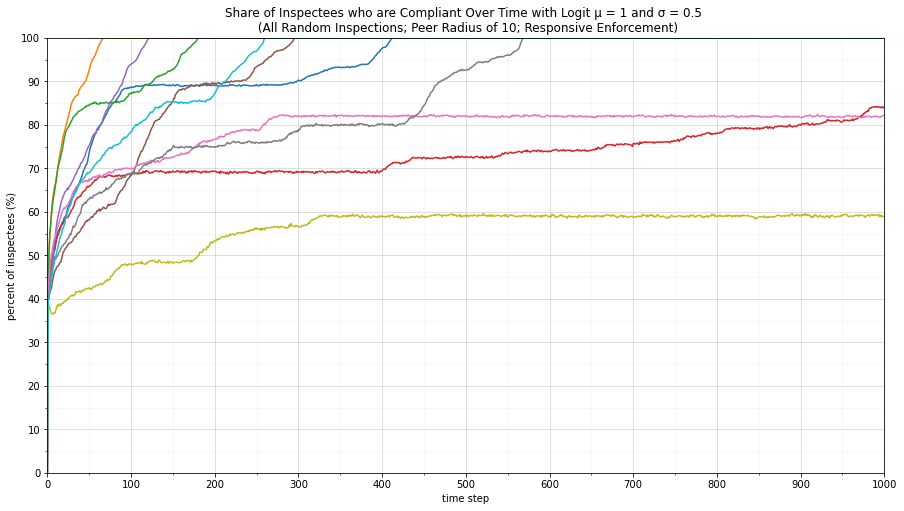

<Figure size 432x288 with 0 Axes>

In [33]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_5_1151['step'],responsive_logit_mu_10_5_1151['perc-compliant'])
plt.plot(responsive_logit_mu_10_5_1152['step'],responsive_logit_mu_10_5_1152['perc-compliant'])
plt.plot(responsive_logit_mu_10_5_1153['step'],responsive_logit_mu_10_5_1153['perc-compliant'])
plt.plot(responsive_logit_mu_10_5_1154['step'],responsive_logit_mu_10_5_1154['perc-compliant'])
plt.plot(responsive_logit_mu_10_5_1155['step'],responsive_logit_mu_10_5_1155['perc-compliant'])
plt.plot(responsive_logit_mu_10_5_1156['step'],responsive_logit_mu_10_5_1156['perc-compliant'])
plt.plot(responsive_logit_mu_10_5_1157['step'],responsive_logit_mu_10_5_1157['perc-compliant'])
plt.plot(responsive_logit_mu_10_5_1158['step'],responsive_logit_mu_10_5_1158['perc-compliant'])
plt.plot(responsive_logit_mu_10_5_1159['step'],responsive_logit_mu_10_5_1159['perc-compliant'])
plt.plot(responsive_logit_mu_10_5_1160['step'],responsive_logit_mu_10_5_1160['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.5 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

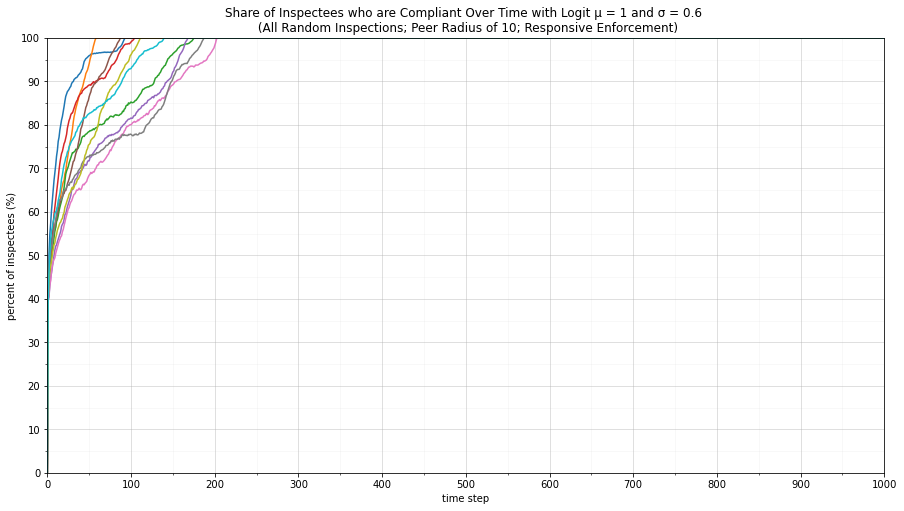

<Figure size 432x288 with 0 Axes>

In [34]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_6_1161['step'],responsive_logit_mu_10_6_1161['perc-compliant'])
plt.plot(responsive_logit_mu_10_6_1162['step'],responsive_logit_mu_10_6_1162['perc-compliant'])
plt.plot(responsive_logit_mu_10_6_1163['step'],responsive_logit_mu_10_6_1163['perc-compliant'])
plt.plot(responsive_logit_mu_10_6_1164['step'],responsive_logit_mu_10_6_1164['perc-compliant'])
plt.plot(responsive_logit_mu_10_6_1165['step'],responsive_logit_mu_10_6_1165['perc-compliant'])
plt.plot(responsive_logit_mu_10_6_1166['step'],responsive_logit_mu_10_6_1166['perc-compliant'])
plt.plot(responsive_logit_mu_10_6_1167['step'],responsive_logit_mu_10_6_1167['perc-compliant'])
plt.plot(responsive_logit_mu_10_6_1168['step'],responsive_logit_mu_10_6_1168['perc-compliant'])
plt.plot(responsive_logit_mu_10_6_1169['step'],responsive_logit_mu_10_6_1169['perc-compliant'])
plt.plot(responsive_logit_mu_10_6_1170['step'],responsive_logit_mu_10_6_1170['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.6 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.6 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

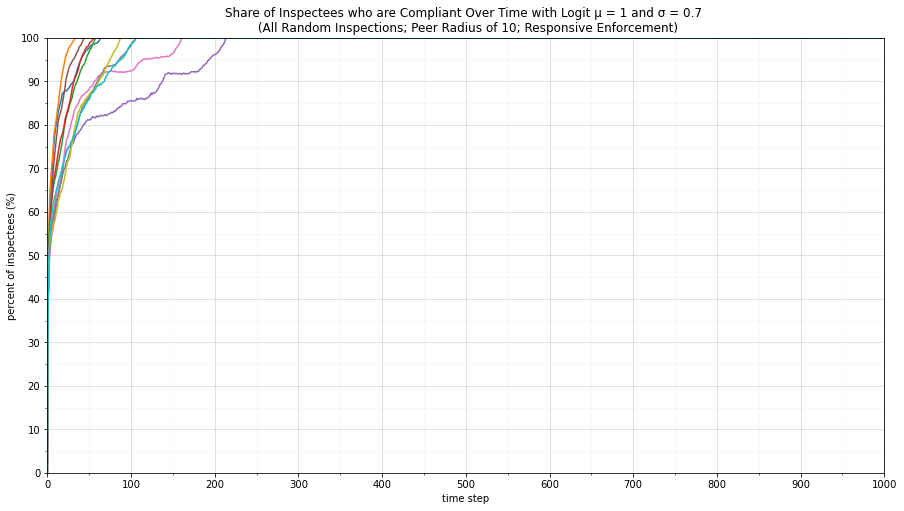

<Figure size 432x288 with 0 Axes>

In [35]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_7_1171['step'],responsive_logit_mu_10_7_1171['perc-compliant'])
plt.plot(responsive_logit_mu_10_7_1172['step'],responsive_logit_mu_10_7_1172['perc-compliant'])
plt.plot(responsive_logit_mu_10_7_1173['step'],responsive_logit_mu_10_7_1173['perc-compliant'])
plt.plot(responsive_logit_mu_10_7_1174['step'],responsive_logit_mu_10_7_1174['perc-compliant'])
plt.plot(responsive_logit_mu_10_7_1175['step'],responsive_logit_mu_10_7_1175['perc-compliant'])
plt.plot(responsive_logit_mu_10_7_1176['step'],responsive_logit_mu_10_7_1176['perc-compliant'])
plt.plot(responsive_logit_mu_10_7_1177['step'],responsive_logit_mu_10_7_1177['perc-compliant'])
plt.plot(responsive_logit_mu_10_7_1178['step'],responsive_logit_mu_10_7_1178['perc-compliant'])
plt.plot(responsive_logit_mu_10_7_1179['step'],responsive_logit_mu_10_7_1179['perc-compliant'])
plt.plot(responsive_logit_mu_10_7_1180['step'],responsive_logit_mu_10_7_1180['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.7 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.7 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

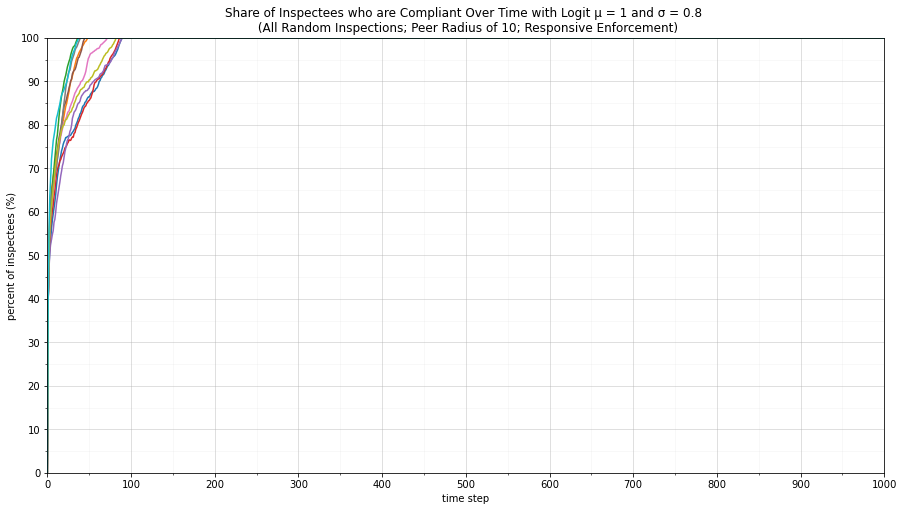

<Figure size 432x288 with 0 Axes>

In [37]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_8_1181['step'],responsive_logit_mu_10_8_1181['perc-compliant'])
plt.plot(responsive_logit_mu_10_8_1182['step'],responsive_logit_mu_10_8_1182['perc-compliant'])
plt.plot(responsive_logit_mu_10_8_1183['step'],responsive_logit_mu_10_8_1183['perc-compliant'])
plt.plot(responsive_logit_mu_10_8_1184['step'],responsive_logit_mu_10_8_1184['perc-compliant'])
plt.plot(responsive_logit_mu_10_8_1185['step'],responsive_logit_mu_10_8_1185['perc-compliant'])
plt.plot(responsive_logit_mu_10_8_1186['step'],responsive_logit_mu_10_8_1186['perc-compliant'])
plt.plot(responsive_logit_mu_10_8_1187['step'],responsive_logit_mu_10_8_1187['perc-compliant'])
plt.plot(responsive_logit_mu_10_8_1188['step'],responsive_logit_mu_10_8_1188['perc-compliant'])
plt.plot(responsive_logit_mu_10_8_1189['step'],responsive_logit_mu_10_8_1189['perc-compliant'])
plt.plot(responsive_logit_mu_10_8_1190['step'],responsive_logit_mu_10_8_1190['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.8 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.8 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

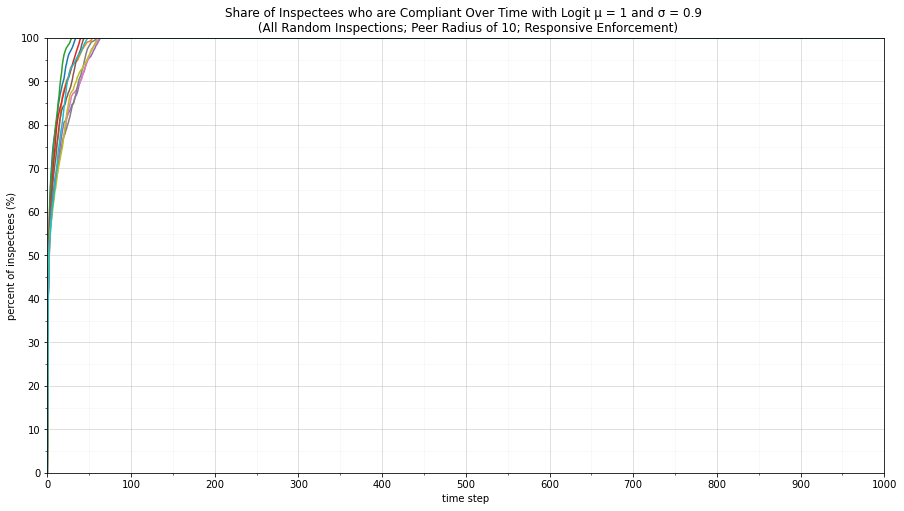

<Figure size 432x288 with 0 Axes>

In [38]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_9_1191['step'],responsive_logit_mu_10_9_1191['perc-compliant'])
plt.plot(responsive_logit_mu_10_9_1192['step'],responsive_logit_mu_10_9_1192['perc-compliant'])
plt.plot(responsive_logit_mu_10_9_1193['step'],responsive_logit_mu_10_9_1193['perc-compliant'])
plt.plot(responsive_logit_mu_10_9_1194['step'],responsive_logit_mu_10_9_1194['perc-compliant'])
plt.plot(responsive_logit_mu_10_9_1195['step'],responsive_logit_mu_10_9_1195['perc-compliant'])
plt.plot(responsive_logit_mu_10_9_1196['step'],responsive_logit_mu_10_9_1196['perc-compliant'])
plt.plot(responsive_logit_mu_10_9_1197['step'],responsive_logit_mu_10_9_1197['perc-compliant'])
plt.plot(responsive_logit_mu_10_9_1198['step'],responsive_logit_mu_10_9_1198['perc-compliant'])
plt.plot(responsive_logit_mu_10_9_1199['step'],responsive_logit_mu_10_9_1199['perc-compliant'])
plt.plot(responsive_logit_mu_10_9_1200['step'],responsive_logit_mu_10_9_1200['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.9 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.9 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

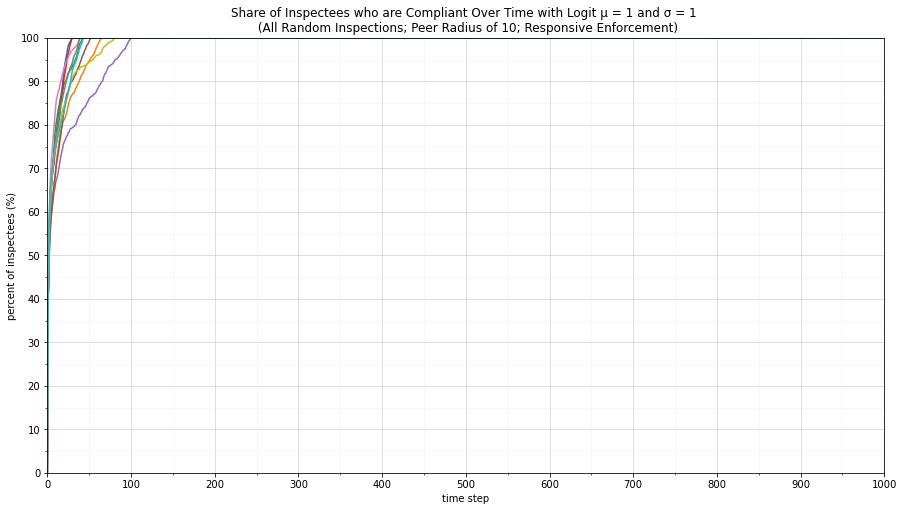

<Figure size 432x288 with 0 Axes>

In [39]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(responsive_logit_mu_10_10_1201['step'],responsive_logit_mu_10_10_1201['perc-compliant'])
plt.plot(responsive_logit_mu_10_10_1202['step'],responsive_logit_mu_10_10_1202['perc-compliant'])
plt.plot(responsive_logit_mu_10_10_1203['step'],responsive_logit_mu_10_10_1203['perc-compliant'])
plt.plot(responsive_logit_mu_10_10_1204['step'],responsive_logit_mu_10_10_1204['perc-compliant'])
plt.plot(responsive_logit_mu_10_10_1205['step'],responsive_logit_mu_10_10_1205['perc-compliant'])
plt.plot(responsive_logit_mu_10_10_1206['step'],responsive_logit_mu_10_10_1206['perc-compliant'])
plt.plot(responsive_logit_mu_10_10_1207['step'],responsive_logit_mu_10_10_1207['perc-compliant'])
plt.plot(responsive_logit_mu_10_10_1208['step'],responsive_logit_mu_10_10_1208['perc-compliant'])
plt.plot(responsive_logit_mu_10_10_1209['step'],responsive_logit_mu_10_10_1209['perc-compliant'])
plt.plot(responsive_logit_mu_10_10_1210['step'],responsive_logit_mu_10_10_1210['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 1 \n (All Random Inspections; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=1 Time vs Compliant All Runs (Random, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')